In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [137]:
df = pd.read_pickle("files/recofill_paa.pkl")

In [138]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [139]:
clean_dataset(df)

,A-MeltPress-Die,A-MonomerFlap,A-QuenchingCab-Press,A-CoolingAir-FlowRate,A2-CoolingAir-FlowRate,A-ProcessAir-Ratio,A-Extruder-Speed,A-SpinPump-Speed,A-SuctionAirFan-Speed,A2-SuctionAirFan-Speed,...,E-Extruder-Speed,E-SpinPump-Speed,E-SuctionAirFan-Speed,E2-SuctionAirFan-Speed,E1-PA-CoolingAir-Temp,E2-PA-CoolingAir-Temp,L-Cal-PvHeatStr1TempPr,L-Cal-PvHeatHSRTempPr,L-Cal-PvDrHSRV,L-Cal-SRoll-Draft
0,0.000747,0.074890,0.010371,0.063891,0.000000,0.000000,0.000000,0.000245,0.000000,0.000000,...,0.000000,0.165190,0.000000,0.000000,0.405322,0.625772,0.348591,0.527156,0.994060,0.0
1,0.000747,0.074890,0.010922,0.063891,0.000000,0.000000,0.000000,0.000245,0.000000,0.000000,...,0.000000,0.165190,0.000000,0.000000,0.423263,0.649740,0.348591,0.527156,0.994060,0.0
2,0.000747,0.074890,0.011067,0.063891,0.000000,0.000000,0.000000,0.000245,0.000000,0.000000,...,0.000000,0.165190,0.000000,0.000000,0.436669,0.663619,0.348591,0.527156,0.994060,0.0
3,0.000746,0.074890,0.010298,0.063891,0.000000,0.000000,0.000000,0.000245,0.000000,0.000000,...,0.000000,0.165190,0.000000,0.000000,0.430571,0.664469,0.348591,0.527156,0.994060,0.0
4,0.000747,0.074890,0.010655,0.063891,0.000000,0.000000,0.000000,0.000245,0.000000,0.000000,...,0.000000,0.165190,0.000000,0.000000,0.442674,0.669715,0.348591,0.527156,0.994060,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.873725,0.986884,0.988960,0.788145,0.982284,0.031044,0.821633,0.998935,0.926058,0.683150,...,0.845630,0.999127,0.996395,0.852022,0.219159,0.480660,0.982250,0.974567,0.334895,1.0
296,0.872410,0.986800,0.988964,0.786525,0.981926,0.031044,0.823511,0.998938,0.926062,0.683156,...,0.847827,0.999138,0.996397,0.852018,0.224186,0.479393,0.982449,0.974805,0.334923,1.0
297,0.870911,0.986930,0.988971,0.784909,0.981014,0.031044,0.825243,0.998937,0.926066,0.683148,...,0.849740,0.999137,0.996392,0.852026,0.217031,0.482568,0.982481,0.974012,0.334913,1.0
298,0.870176,0.986801,0.988944,0.783029,0.981005,0.031044,0.826817,0.998939,0.926056,0.683151,...,0.851144,0.999142,0.996393,0.852011,0.222219,0.483451,0.982575,0.974168,0.334904,1.0


### Cerco il miglior parametro K per il k-means

In [140]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

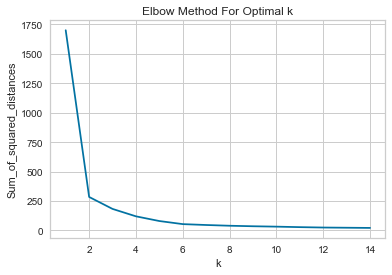

In [141]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

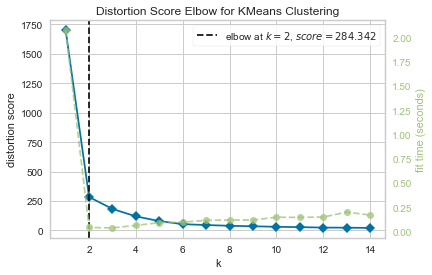

In [142]:
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figu

### Applico il k-means con l'obiettivo di ottenere 5 cluster 

In [143]:
model = KMeans(n_clusters=5)
model.fit(df)

KMeans(n_clusters=5)

In [144]:
all_predictions = model.predict(df)

In [145]:
all_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [146]:
df['cluster'] = all_predictions.tolist()

### Pearson correlation e Shapiro (pseudo distribuzione normale) ranking

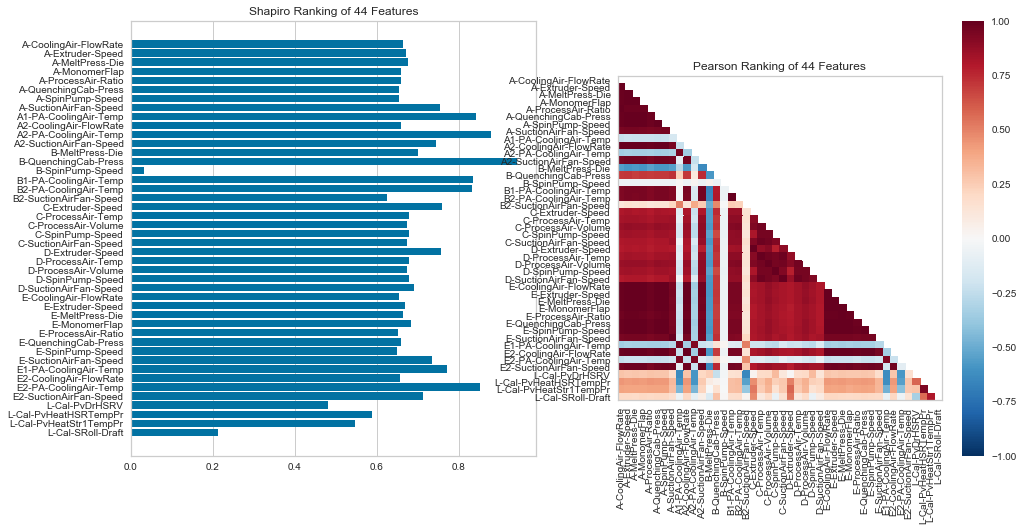

In [150]:
from yellowbrick.features import rank1d, rank2d


y, axes = plt.subplots(ncols=2, figsize=(16,8))

rank1d(X, ax=axes[0], show=False)
rank2d(X, ax=axes[1], show=False)
plt.show()

### Plot di ciascuna label del cluster su ciascuna Time Series

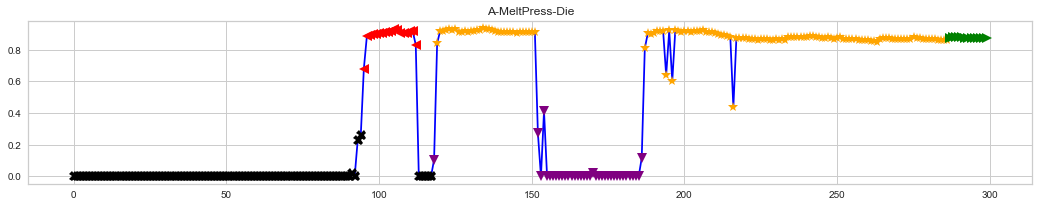

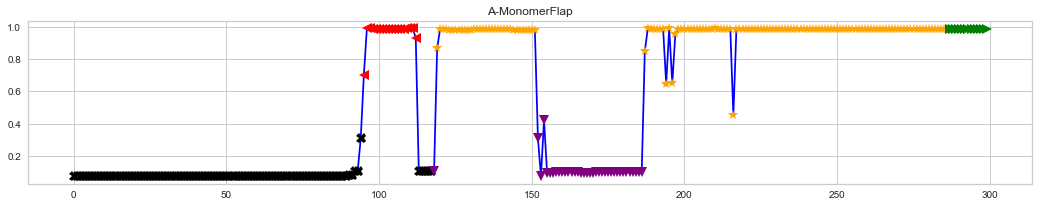

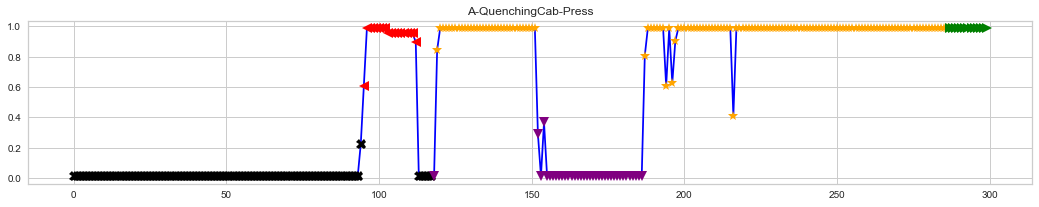

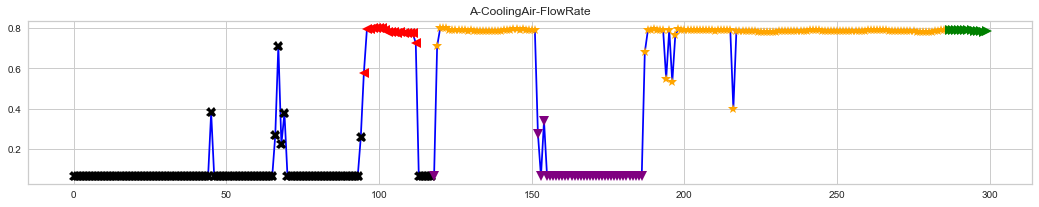

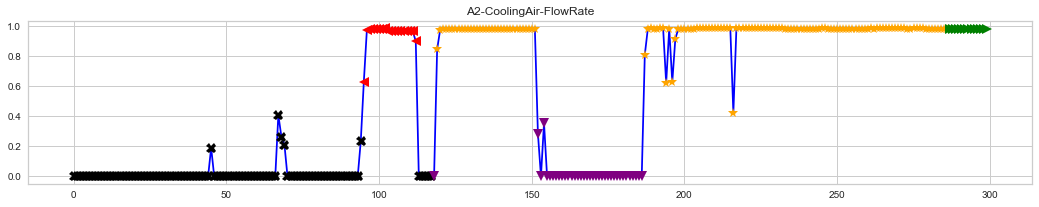

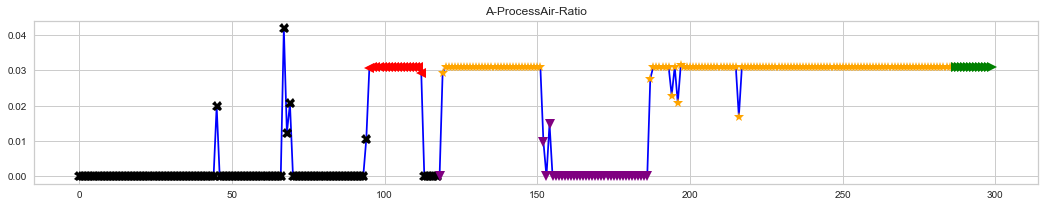

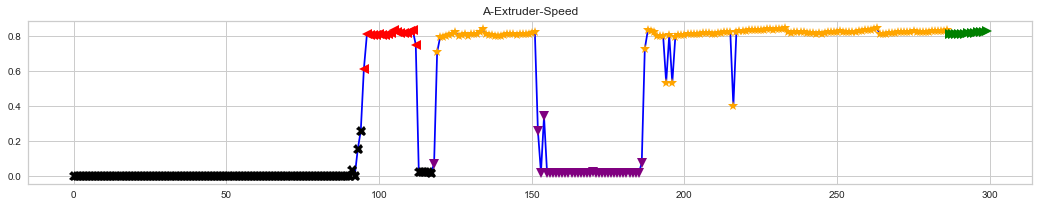

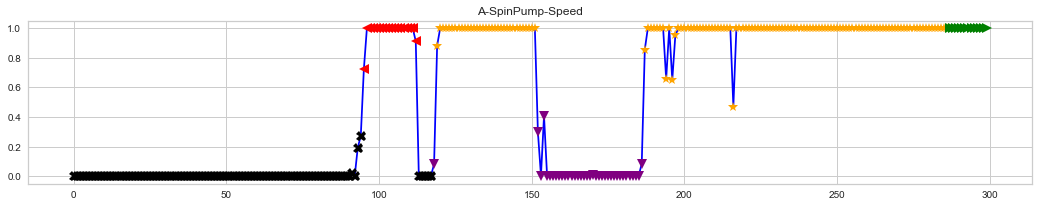

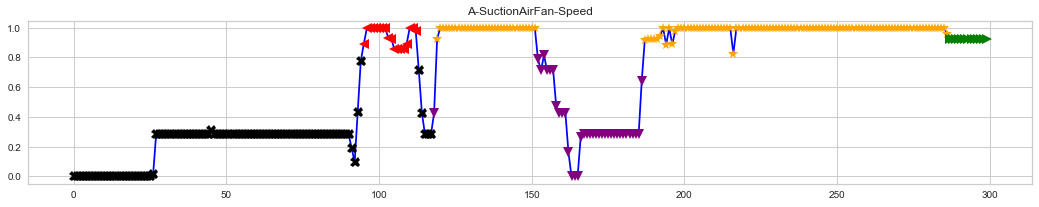

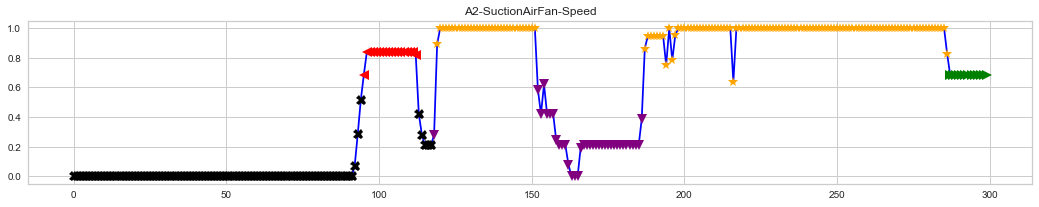

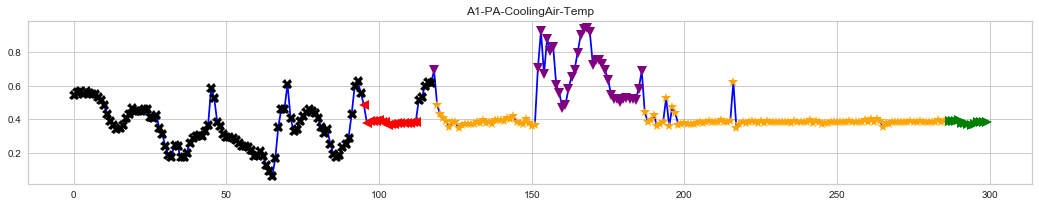

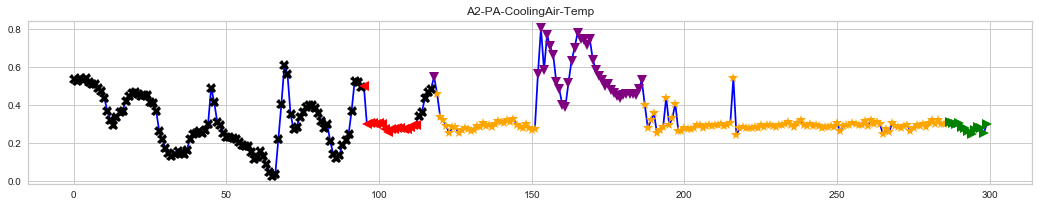

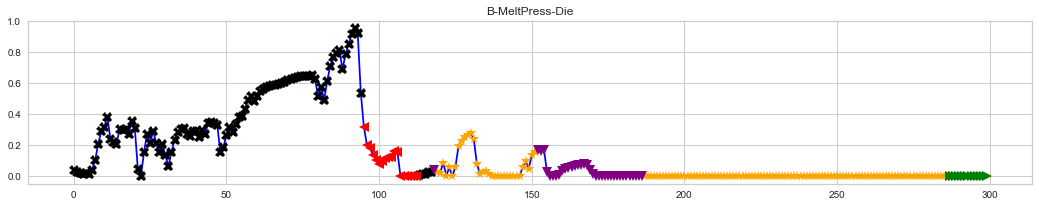

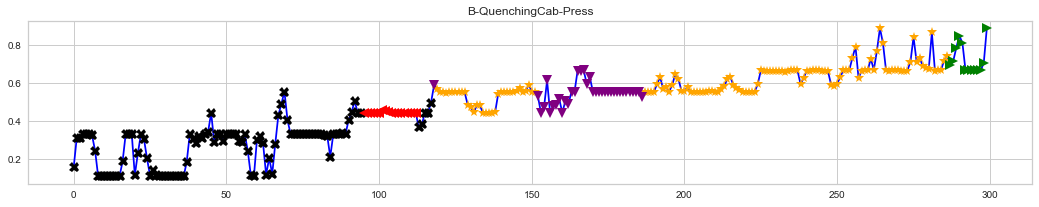

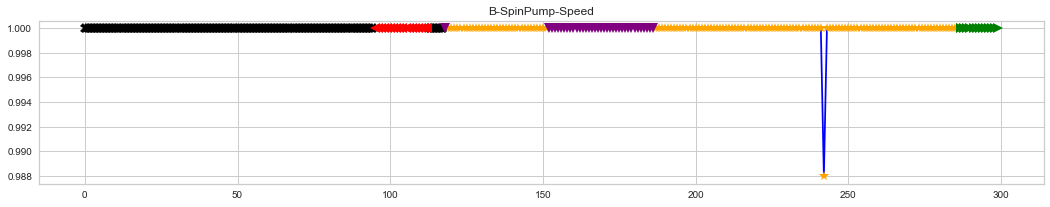

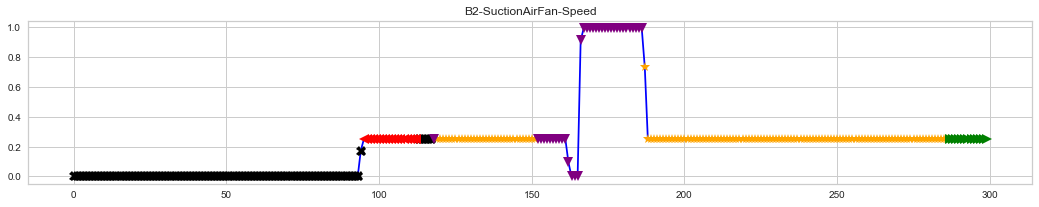

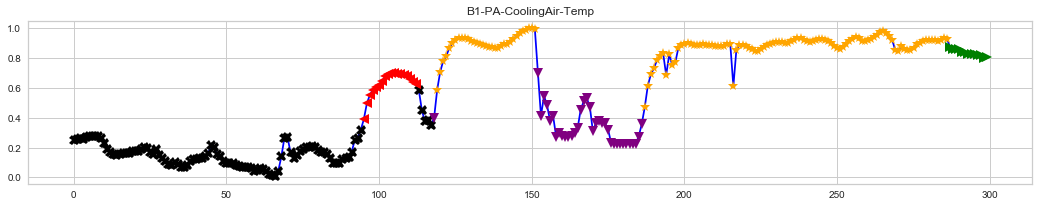

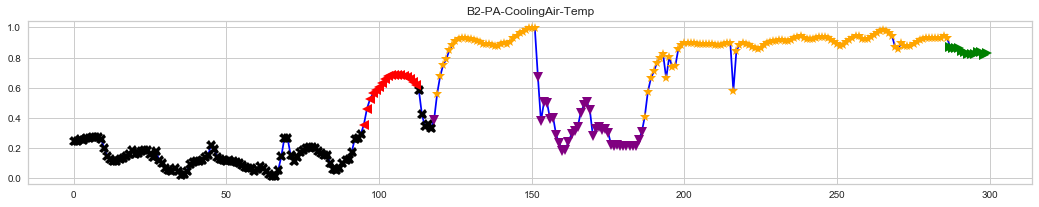

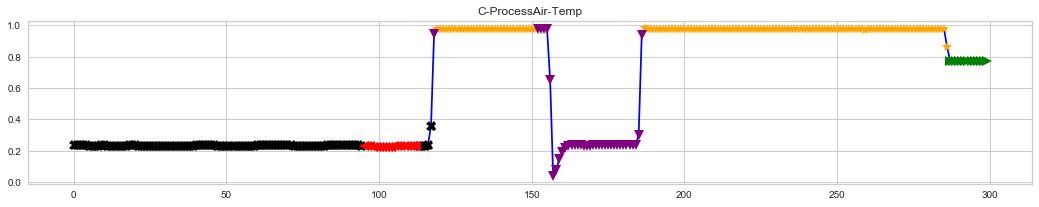

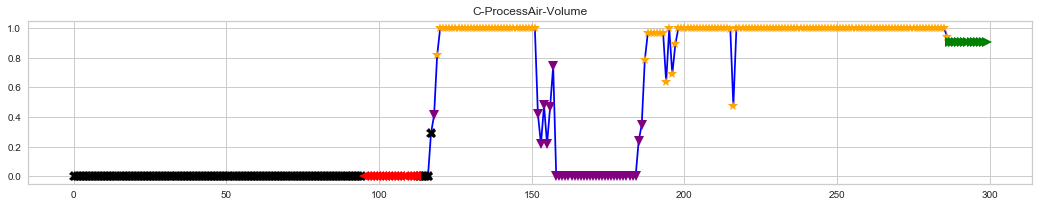

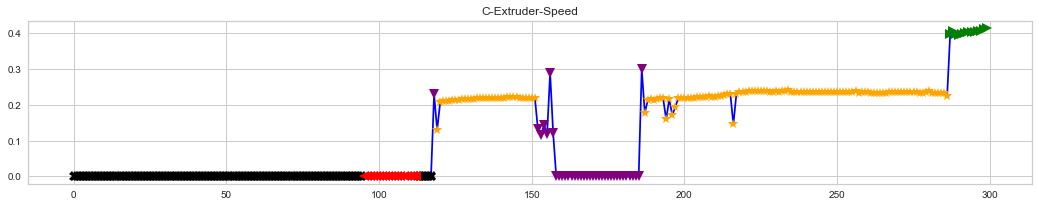

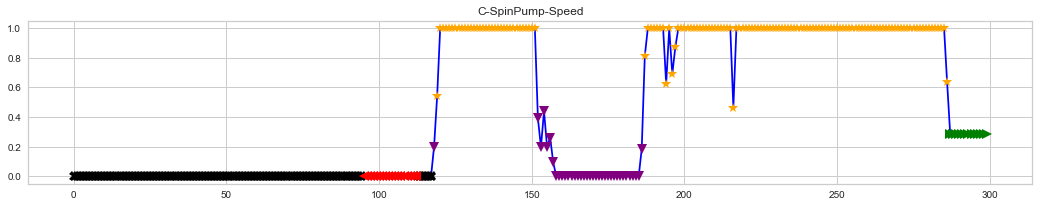

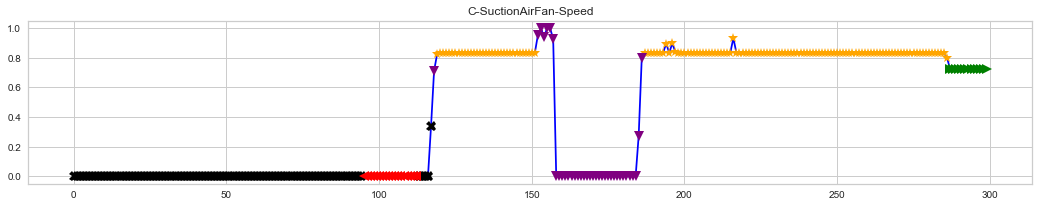

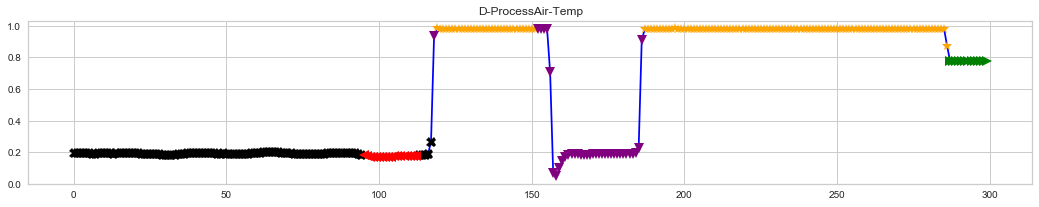

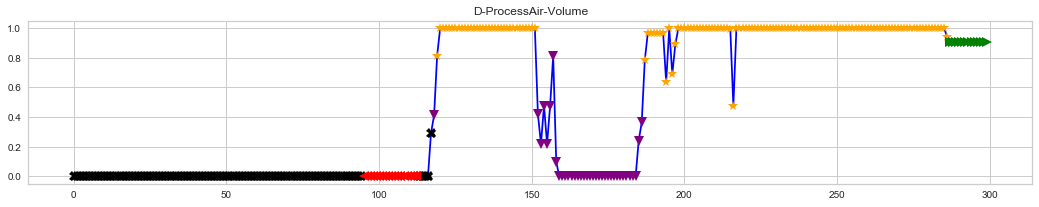

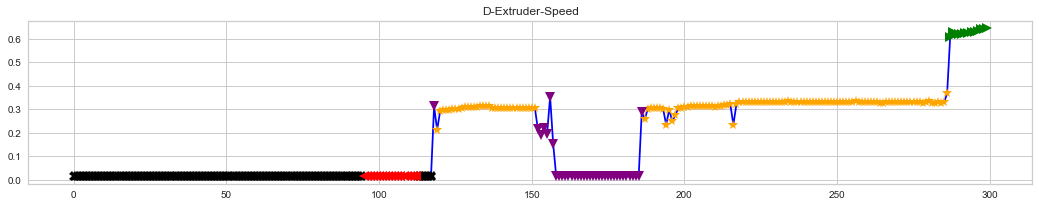

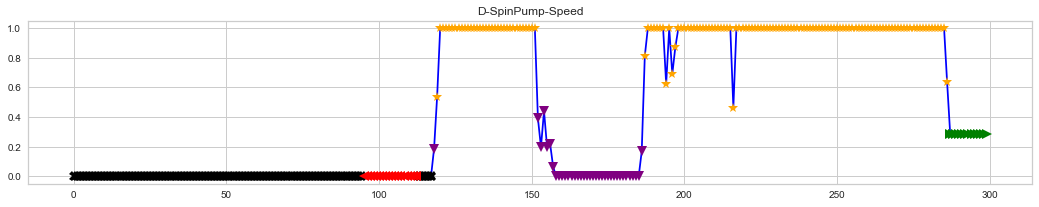

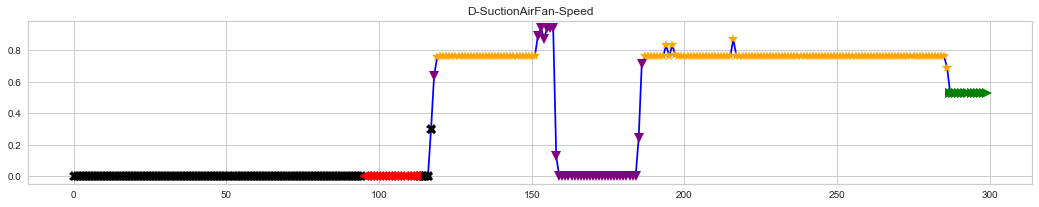

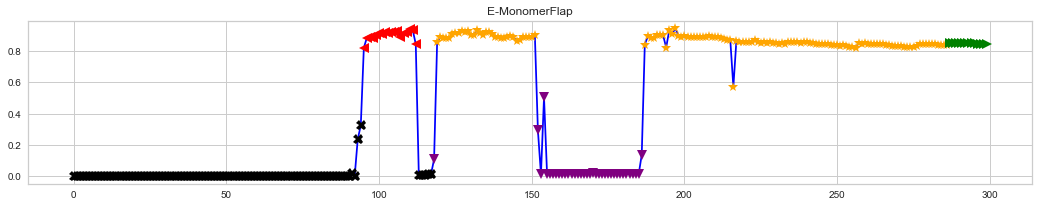

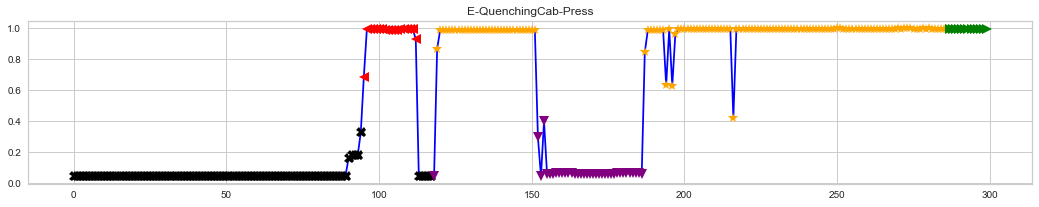

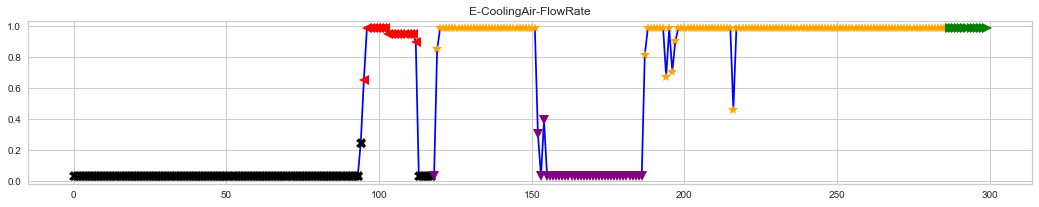

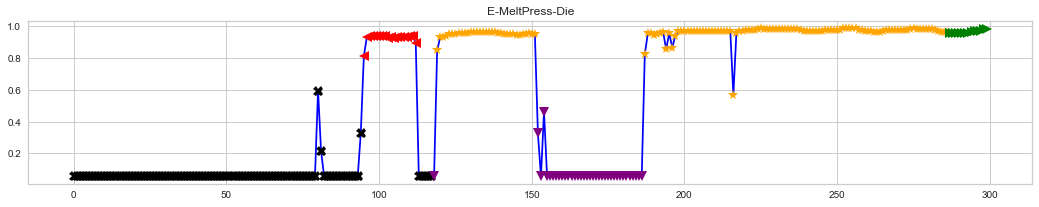

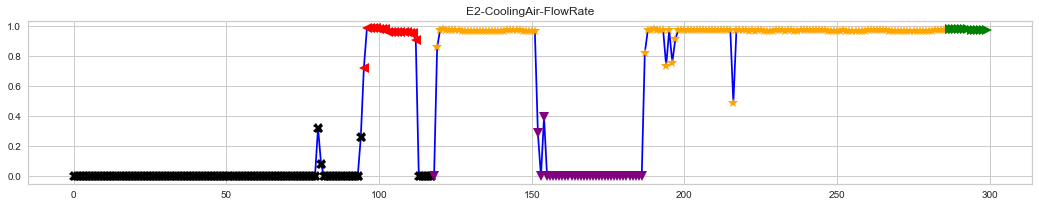

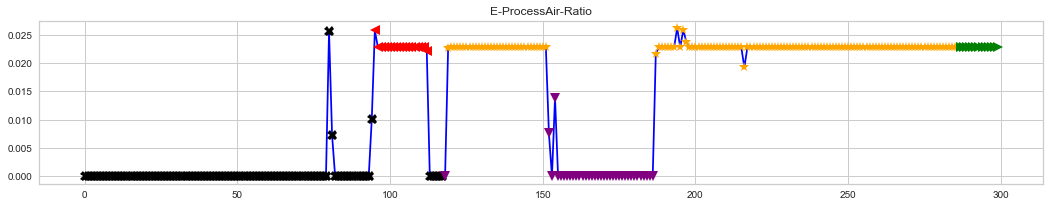

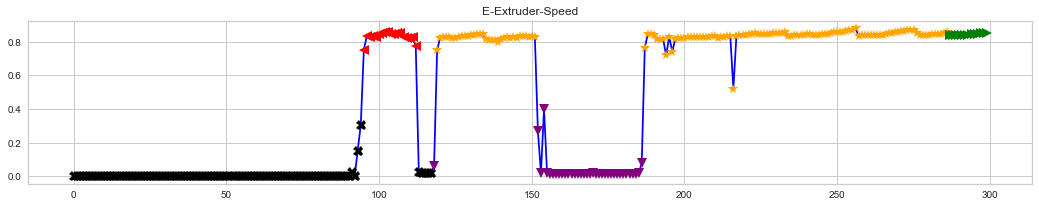

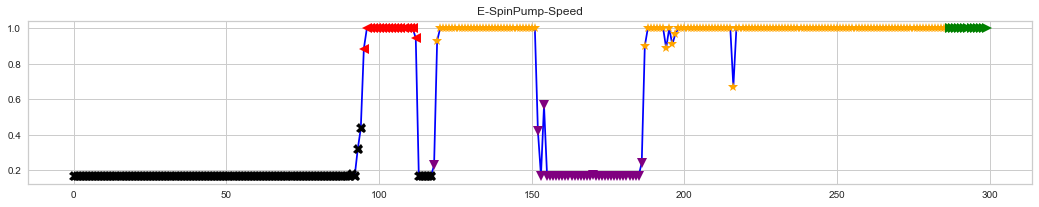

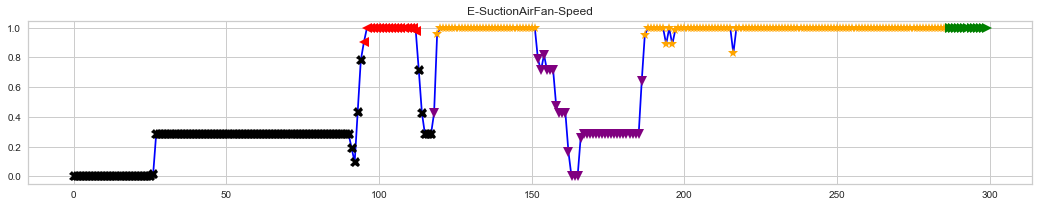

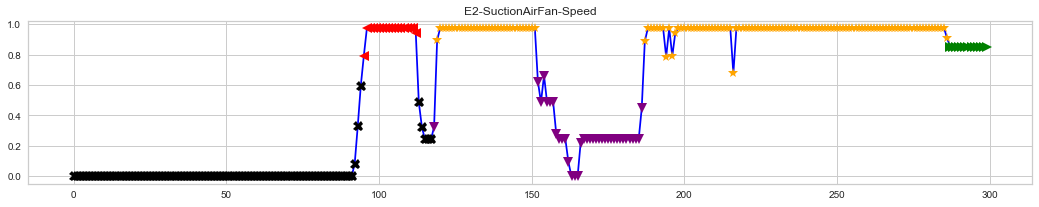

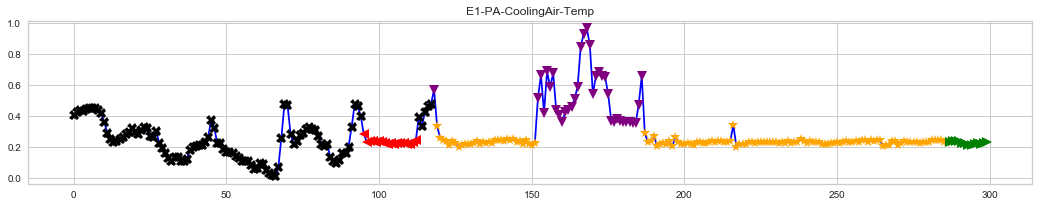

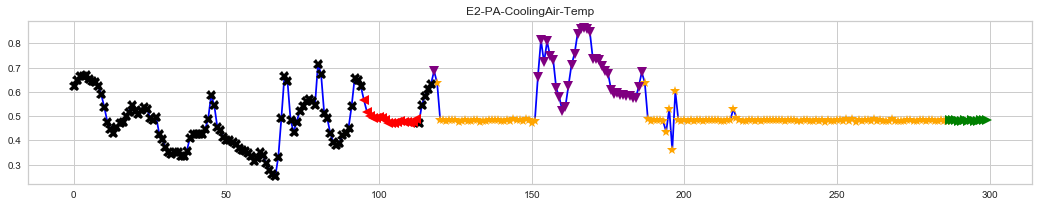

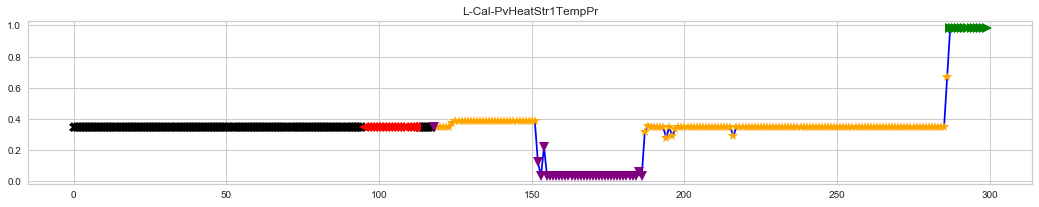

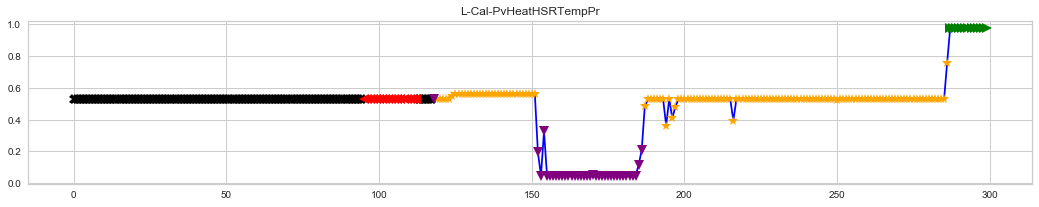

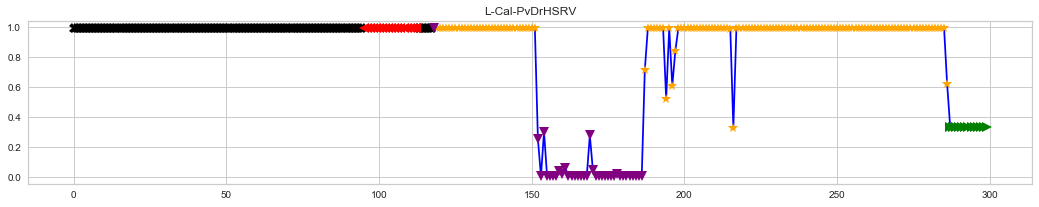

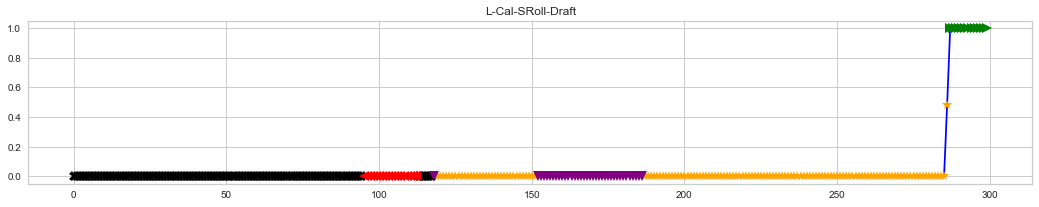

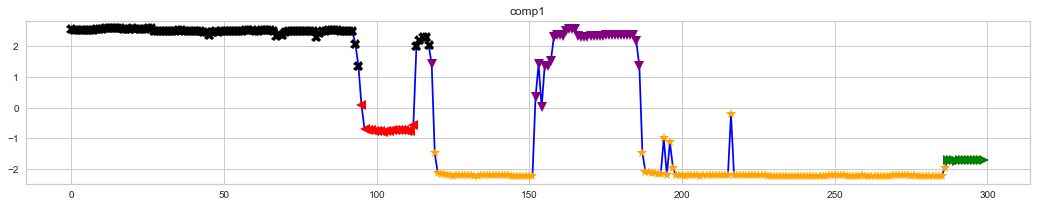

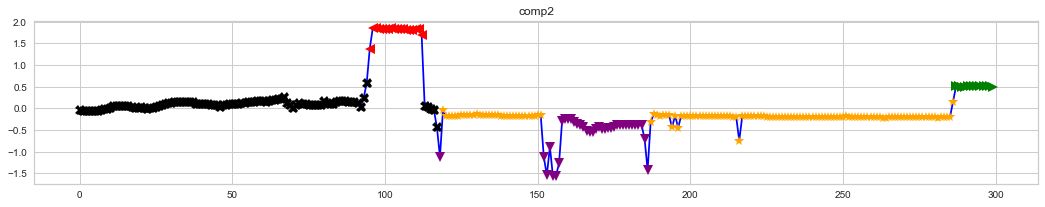

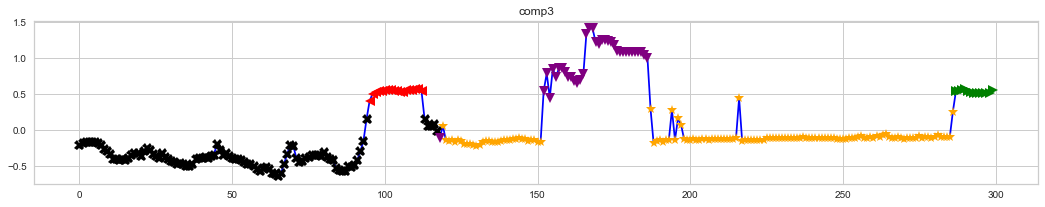

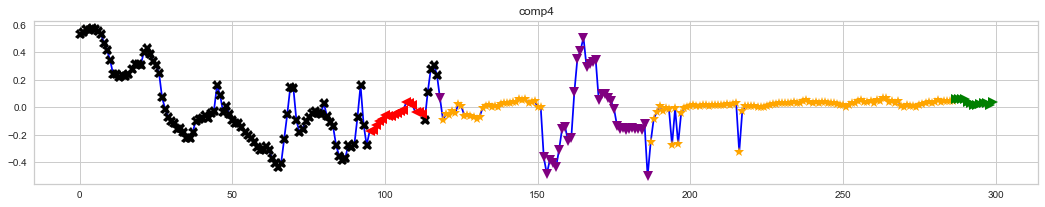

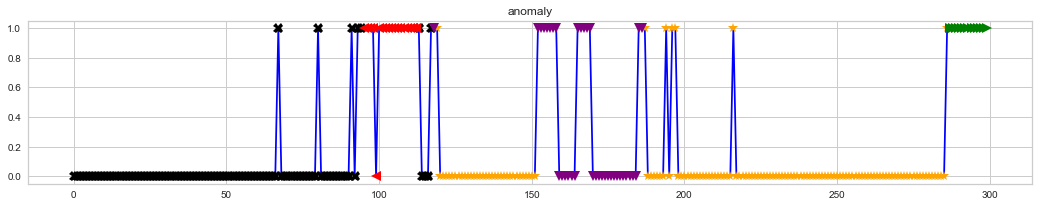

In [177]:
status_0 = df[df['cluster']==0]
status_1 = df[df['cluster']==1]
status_2 = df[df['cluster']==2]
status_3 = df[df['cluster']==3]
status_4 = df[df['cluster']==4]
# Extract the names of the numerical columns
df_features = df.drop(['cluster'], axis=1)
feature_names = df_features.columns

# Plot time series for each sensor with CLUSTER state marked 
for name in feature_names:
    _ = plt.figure(figsize=(18,3))    
    _ = plt.plot(df[name], color='blue')    
    _ = plt.plot(status_0[name], linestyle='none', marker='*', color='orange', markersize=10)
    _ = plt.plot(status_1[name], linestyle='none', marker='X', color='black', markersize=10)
    _ = plt.plot(status_2[name], linestyle='none', marker='<', color='red', markersize=10)
    _ = plt.plot(status_3[name], linestyle='none', marker='v', color='purple', markersize=10)
    _ = plt.plot(status_4[name], linestyle='none', marker='>', color='green', markersize=10)
    _ = plt.title(name)
    plt.show()

### Generazioni di componenti aggiuntivi con la Principal Component Analysis

In [152]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA

In [153]:
class_name = 'cluster'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

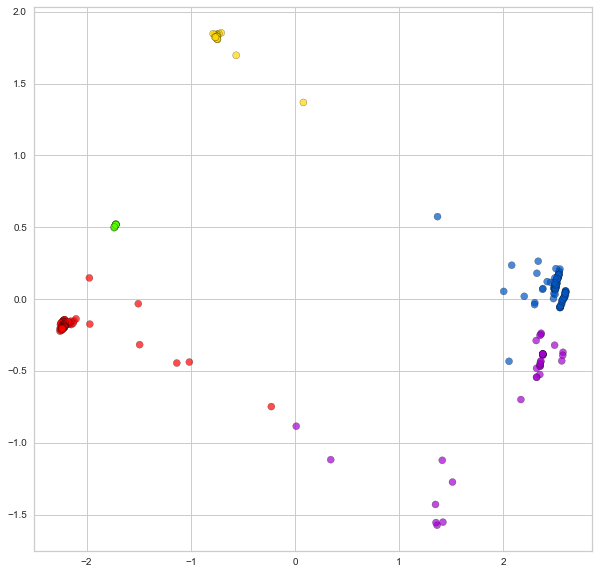

In [154]:
pca = PCA(n_components=5)

pca.fit(X)
X_pca = pca.transform(X)
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [155]:
df['comp1'] = X_pca[:,0]
df['comp2'] = X_pca[:,1]
df['comp3'] = X_pca[:,2]
df['comp4'] = X_pca[:,3]
df['comp5'] = X_pca[:,4]

df.head()

,A-MeltPress-Die,A-MonomerFlap,A-QuenchingCab-Press,A-CoolingAir-FlowRate,A2-CoolingAir-FlowRate,A-ProcessAir-Ratio,A-Extruder-Speed,A-SpinPump-Speed,A-SuctionAirFan-Speed,A2-SuctionAirFan-Speed,...,E2-PA-CoolingAir-Temp,L-Cal-PvHeatStr1TempPr,L-Cal-PvHeatHSRTempPr,L-Cal-PvDrHSRV,L-Cal-SRoll-Draft,cluster,comp1,comp2,comp3,comp4
0,0.000747,0.07489,0.010371,0.063891,0.0,0.0,0.0,0.000245,0.0,0.0,...,0.625772,0.348591,0.527156,0.99406,0.0,1,2.559710,-0.036997,-0.217652,0.530523
1,0.000747,0.07489,0.010922,0.063891,0.0,0.0,0.0,0.000245,0.0,0.0,...,0.649740,0.348591,0.527156,0.99406,0.0,1,2.549154,-0.051863,-0.181683,0.550441
2,0.000747,0.07489,0.011067,0.063891,0.0,0.0,0.0,0.000245,0.0,0.0,...,0.663619,0.348591,0.527156,0.99406,0.0,1,2.546793,-0.057260,-0.170315,0.569123
3,0.000746,0.07489,0.010298,0.063891,0.0,0.0,0.0,0.000245,0.0,0.0,...,0.664469,0.348591,0.527156,0.99406,0.0,1,2.546932,-0.055824,-0.171664,0.562905
4,0.000747,0.07489,0.010655,0.063891,0.0,0.0,0.0,0.000245,0.0,0.0,...,0.669715,0.348591,0.527156,0.99406,0.0,1,2.544285,-0.060087,-0.162873,0.576689


### Decision Tree Classifier, risultati e importanza delle features

In [156]:
from sklearn.tree import DecisionTreeClassifier
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df['cluster'].astype('string')

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=100, 
                                                    stratify=y)

X_train.shape, X_test.shape

clf = DecisionTreeClassifier(criterion='gini', max_depth=8, 
                             min_samples_split=30, min_samples_leaf=10)
clf.fit(X_train, y_train)

for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

A-MeltPress-Die 0.0
A-MonomerFlap 0.0
A-QuenchingCab-Press 0.0
A-CoolingAir-FlowRate 0.0
A2-CoolingAir-FlowRate 0.0
A-ProcessAir-Ratio 0.0
A-Extruder-Speed 0.0
A-SpinPump-Speed 0.0
A-SuctionAirFan-Speed 0.0
A2-SuctionAirFan-Speed 0.0
A1-PA-CoolingAir-Temp 0.0
A2-PA-CoolingAir-Temp 0.0
B-MeltPress-Die 0.0
B-QuenchingCab-Press 0.0
B-SpinPump-Speed 0.0
B2-SuctionAirFan-Speed 0.0
B1-PA-CoolingAir-Temp 0.0
B2-PA-CoolingAir-Temp 0.0
C-ProcessAir-Temp 0.0
C-ProcessAir-Volume 0.0
C-Extruder-Speed 0.0
C-SpinPump-Speed 0.5660222079125504
C-SuctionAirFan-Speed 0.0
D-ProcessAir-Temp 0.0
D-ProcessAir-Volume 0.0
D-Extruder-Speed 0.0
D-SpinPump-Speed 0.0
D-SuctionAirFan-Speed 0.0
E-MonomerFlap 0.0
E-QuenchingCab-Press 0.0
E-CoolingAir-FlowRate 0.0
E-MeltPress-Die 0.0
E2-CoolingAir-FlowRate 0.0
E-ProcessAir-Ratio 0.0
E-Extruder-Speed 0.0
E-SpinPump-Speed 0.0
E-SuctionAirFan-Speed 0.0
E2-SuctionAirFan-Speed 0.0
E1-PA-CoolingAir-Temp 0.0
E2-PA-CoolingAir-Temp 0.0
L-Cal-PvHeatStr1TempPr 0.0
L-Cal-PvHeatH

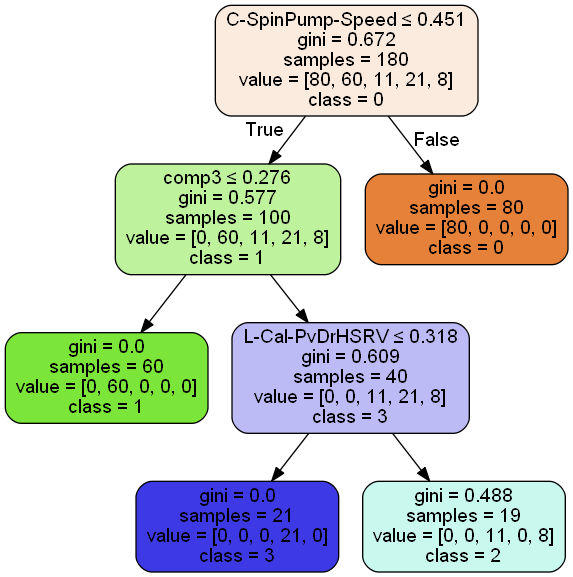

In [157]:
import pydotplus
from IPython.display import Image

from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True
                                )  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [158]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

Accuracy 0.95
F1-score [1.         0.98765432 0.73684211 0.96551724 0.        ]


In [159]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# load data
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df['cluster'].astype('string')
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
model.feature_importances_

array([0.        , 0.02936918, 0.        , 0.        , 0.        ,
       0.        , 0.006135  , 0.        , 0.00088122, 0.00122907,
       0.00483988, 0.        , 0.        , 0.        , 0.        ,
       0.01386539, 0.00049569, 0.00073478, 0.09582962, 0.00479986,
       0.05214205, 0.08353478, 0.01689532, 0.11185205, 0.04720596,
       0.00623006, 0.05937437, 0.        , 0.04935189, 0.02074663,
       0.06177683, 0.        , 0.01891681, 0.01418347, 0.02732137,
       0.00098156, 0.00035406, 0.0122392 , 0.00324562, 0.00057089,
       0.06955365, 0.0390733 , 0.06689069, 0.00728926, 0.        ,
       0.05053775, 0.02014829, 0.00140445])

In [161]:
importances = list(zip(model.feature_importances_, attributes))
importances.sort(reverse=True)
importances

[(0.11185205293892841, 'D-ProcessAir-Temp'),
 (0.09582961688431824, 'C-ProcessAir-Temp'),
 (0.08353478492995434, 'C-SpinPump-Speed'),
 (0.06955365431808391, 'L-Cal-PvHeatStr1TempPr'),
 (0.06689069156538383, 'L-Cal-PvDrHSRV'),
 (0.0617768285861221, 'E-CoolingAir-FlowRate'),
 (0.059374368026509326, 'D-SpinPump-Speed'),
 (0.05214205481554028, 'C-Extruder-Speed'),
 (0.05053774585237256, 'comp2'),
 (0.04935188740181197, 'E-MonomerFlap'),
 (0.047205958009518226, 'D-ProcessAir-Volume'),
 (0.03907330400963354, 'L-Cal-PvHeatHSRTempPr'),
 (0.029369183299077305, 'A-MonomerFlap'),
 (0.027321368460393857, 'E-Extruder-Speed'),
 (0.020746625696888246, 'E-QuenchingCab-Press'),
 (0.02014829304553732, 'comp3'),
 (0.01891680650324711, 'E2-CoolingAir-FlowRate'),
 (0.016895318422035985, 'C-SuctionAirFan-Speed'),
 (0.014183472654984597, 'E-ProcessAir-Ratio'),
 (0.013865385135336559, 'B2-SuctionAirFan-Speed'),
 (0.012239201046576878, 'E2-SuctionAirFan-Speed'),
 (0.007289261992097324, 'L-Cal-SRoll-Draft'),
 (

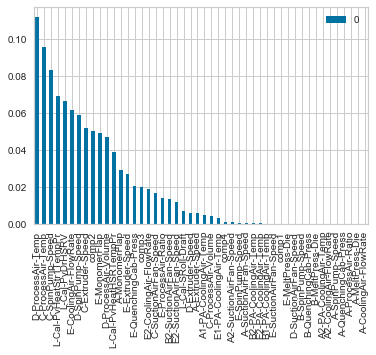

In [162]:
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar')

### ADFuller Test per la stazionarità della TS e plot di autocorrelazione: non è stazionaria

In [163]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import *

In [164]:
result = adfuller(df['C-SpinPump-Speed'])

In [165]:
print(result[1])

0.3721851239933058


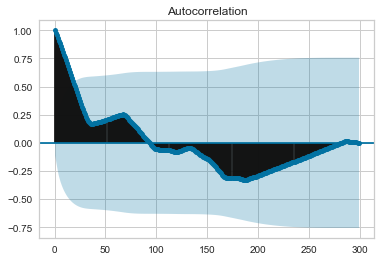

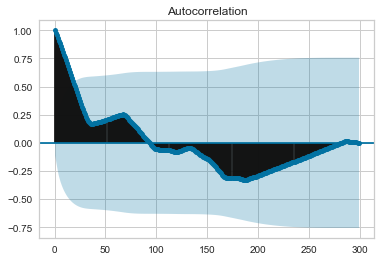

In [166]:
pca1_df = df['C-SpinPump-Speed']
plot_acf(pca1_df.dropna(), lags=299, alpha=0.05)

### Ricerca di eventuali outliers con IsolationForest

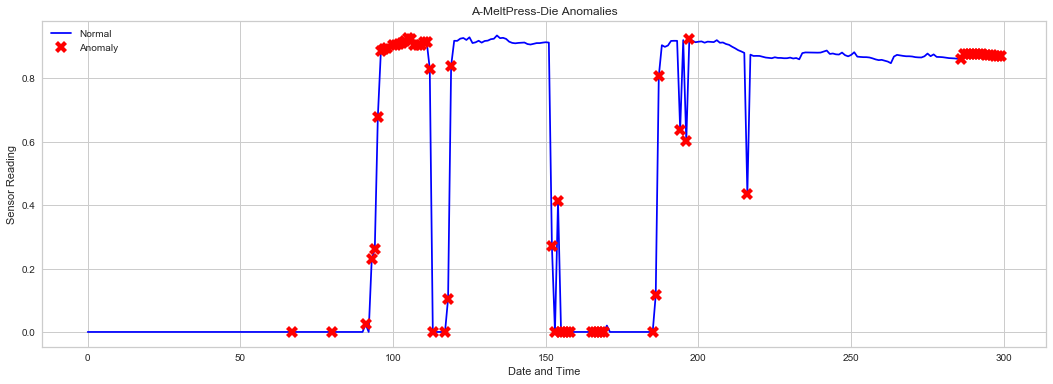

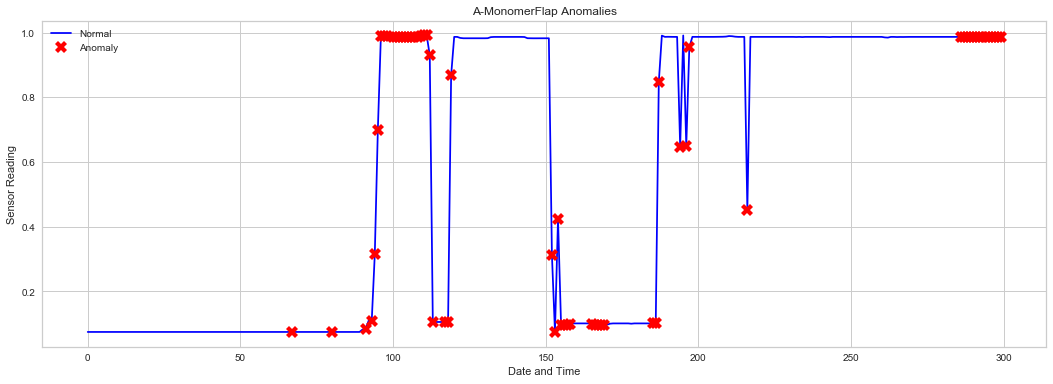

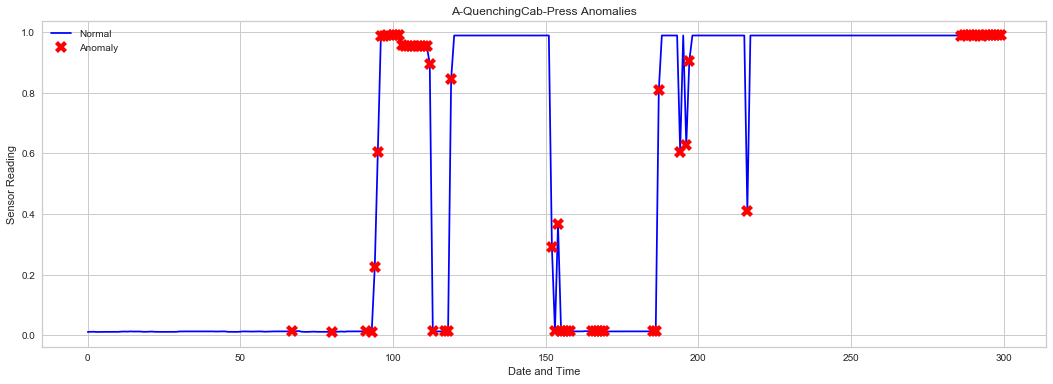

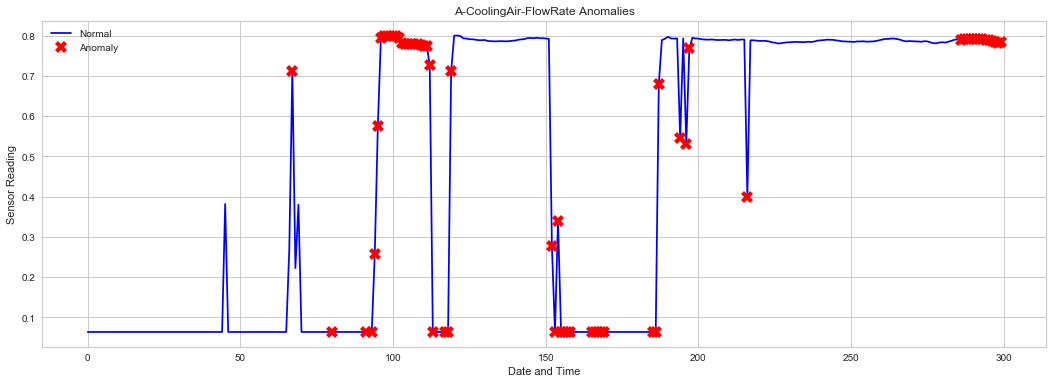

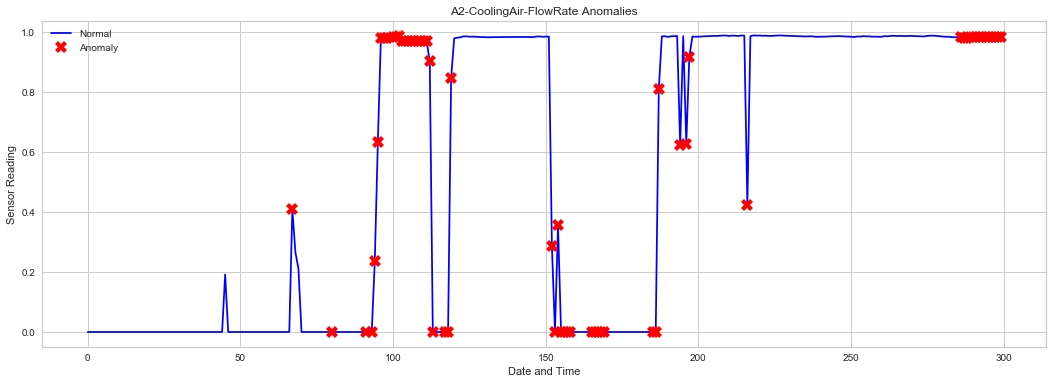

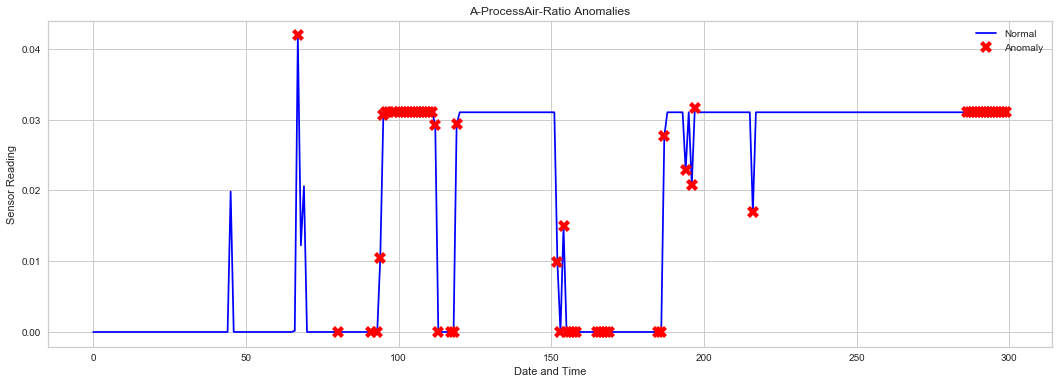

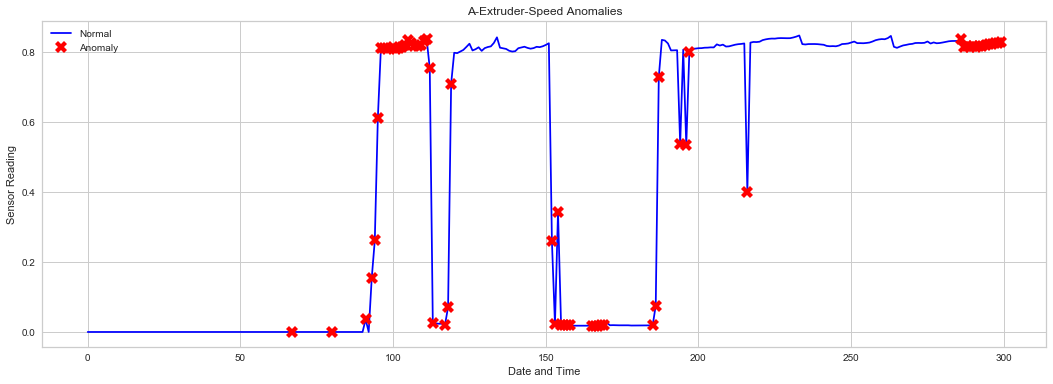

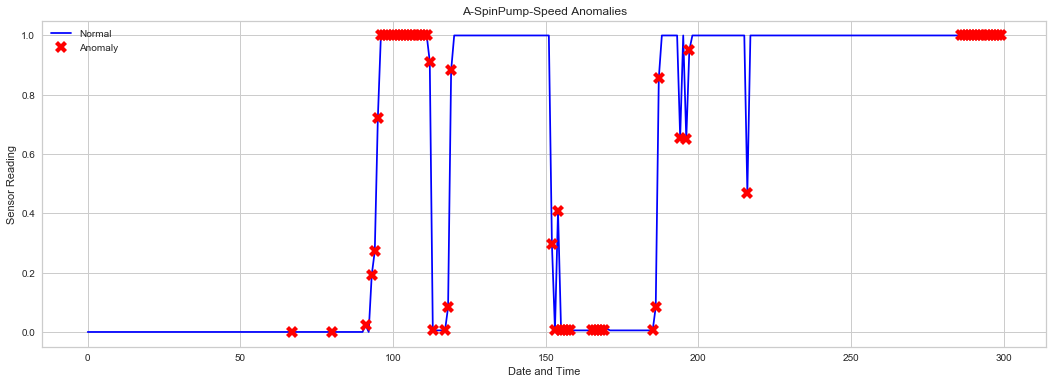

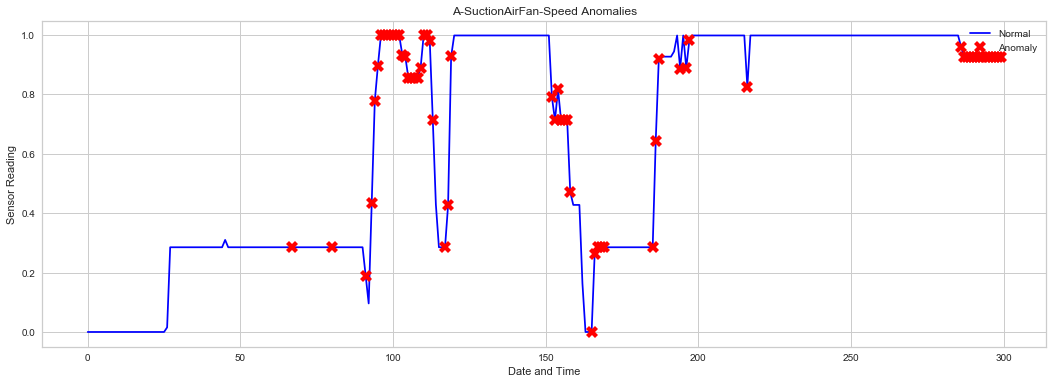

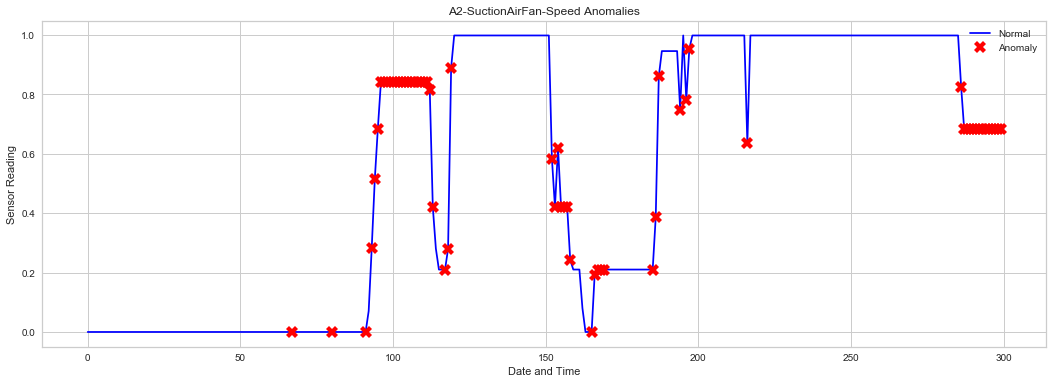

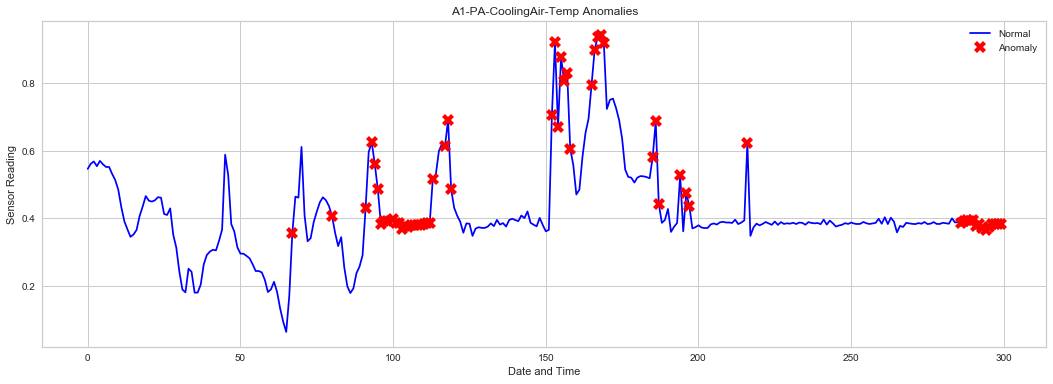

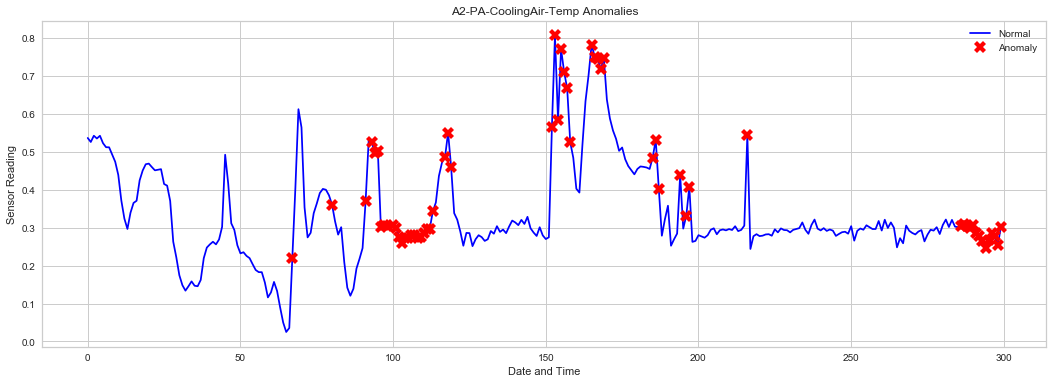

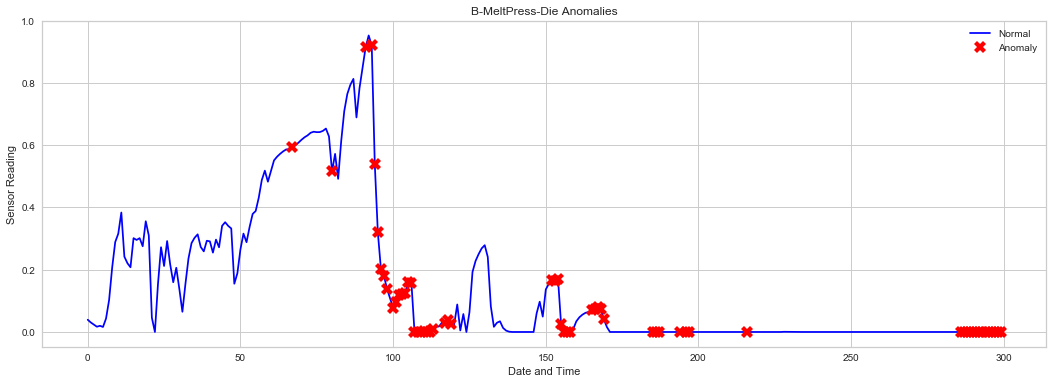

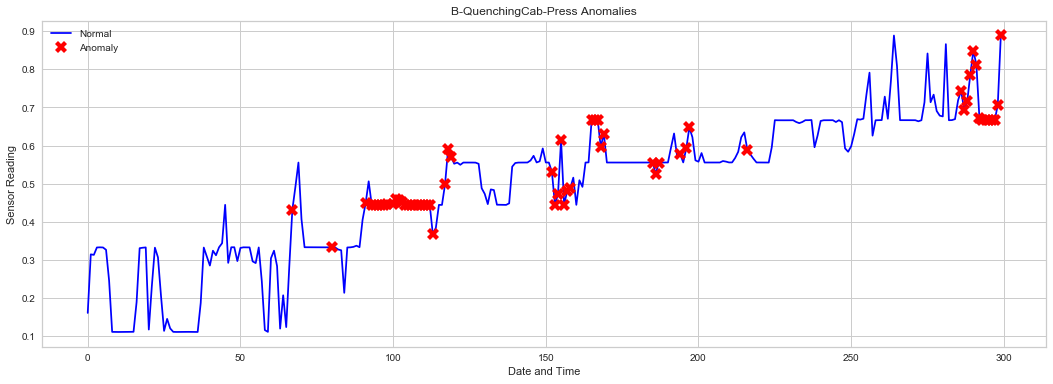

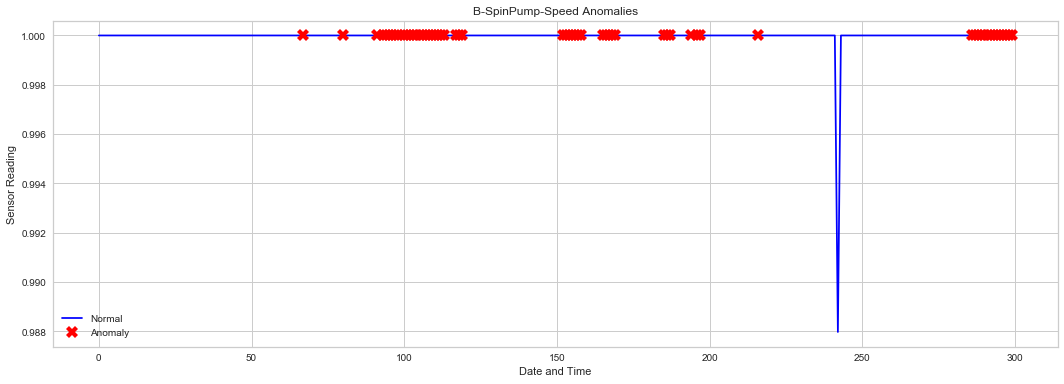

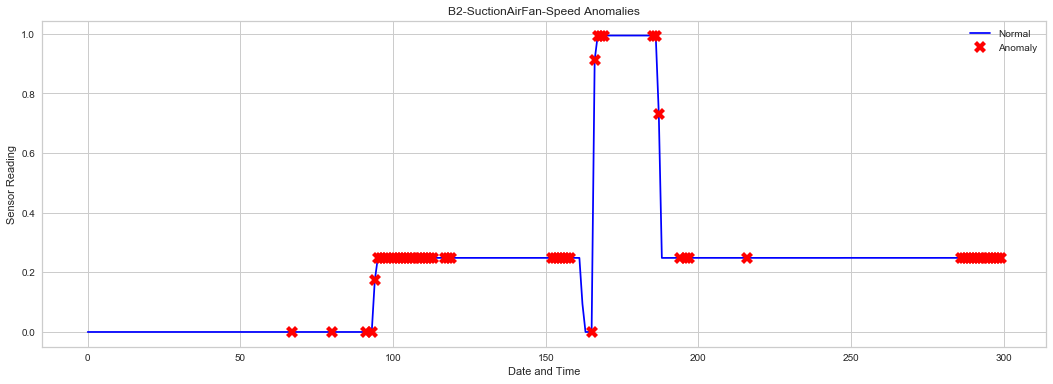

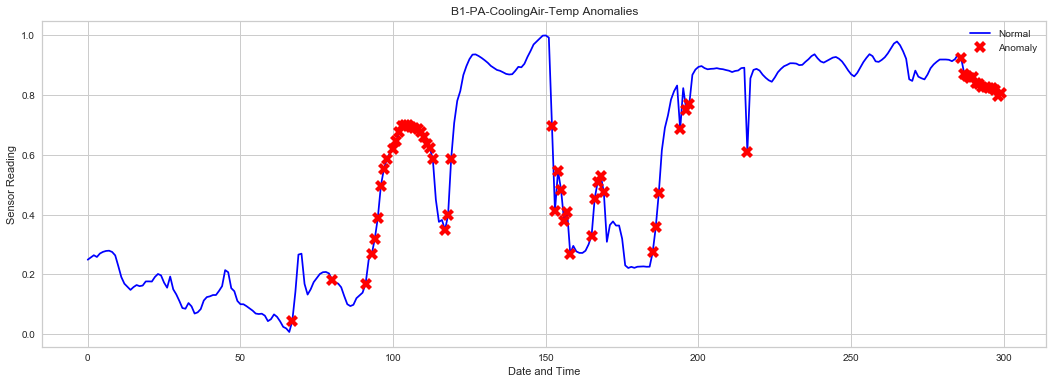

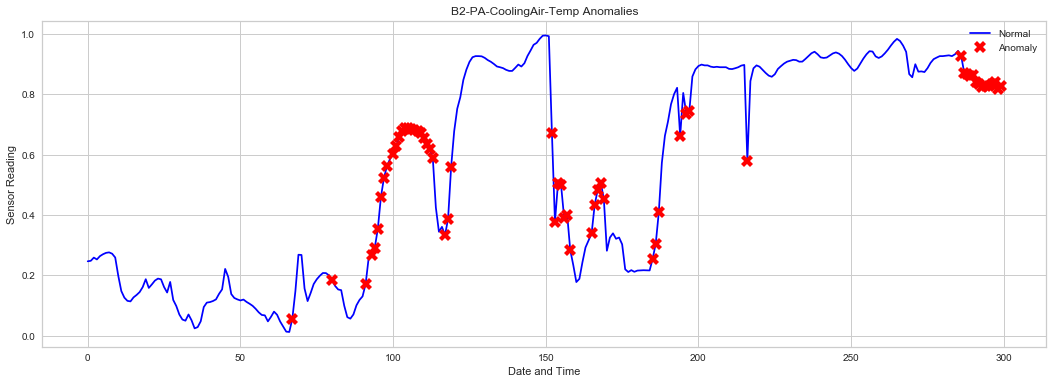

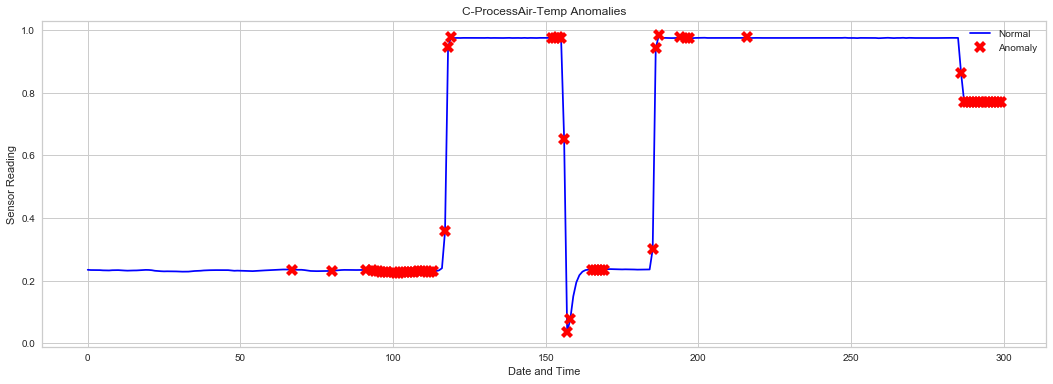

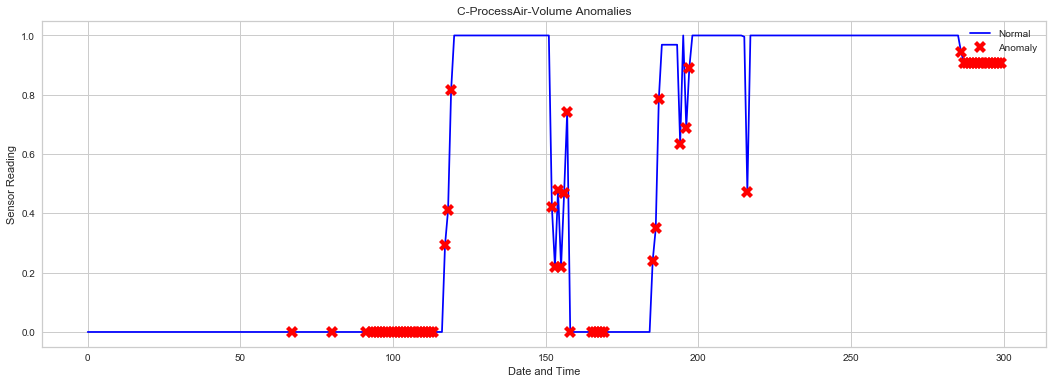

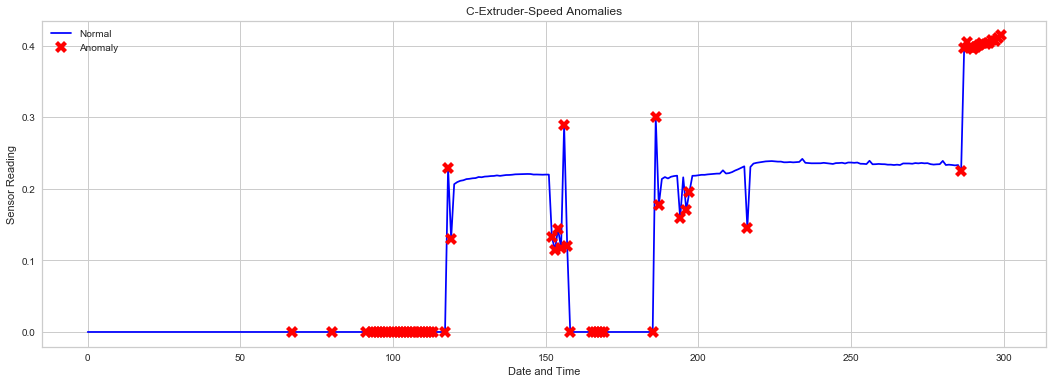

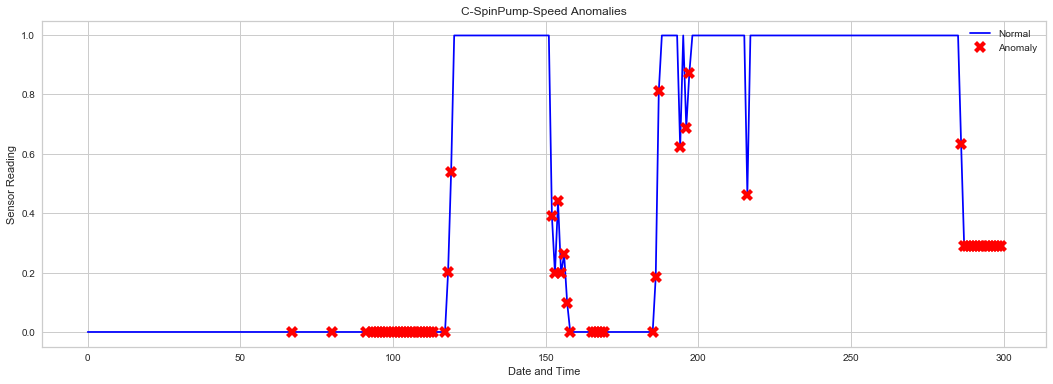

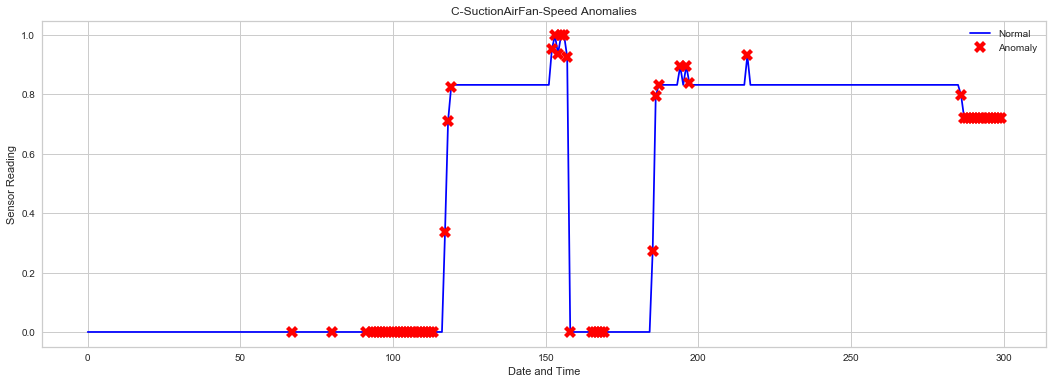

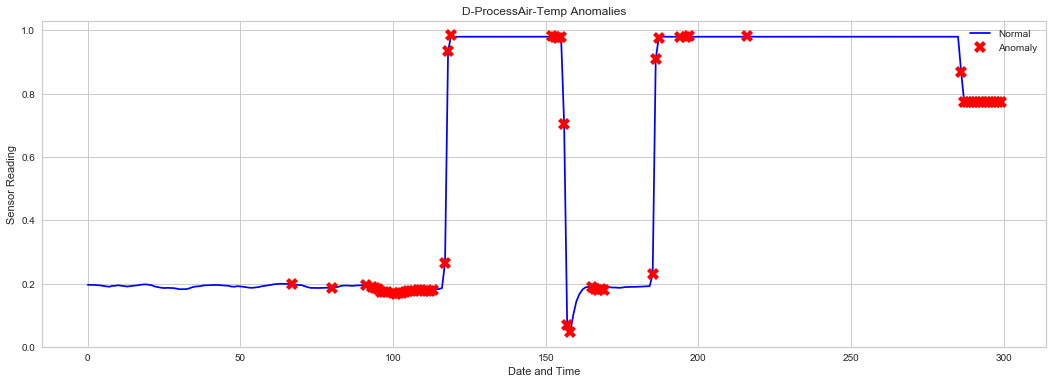

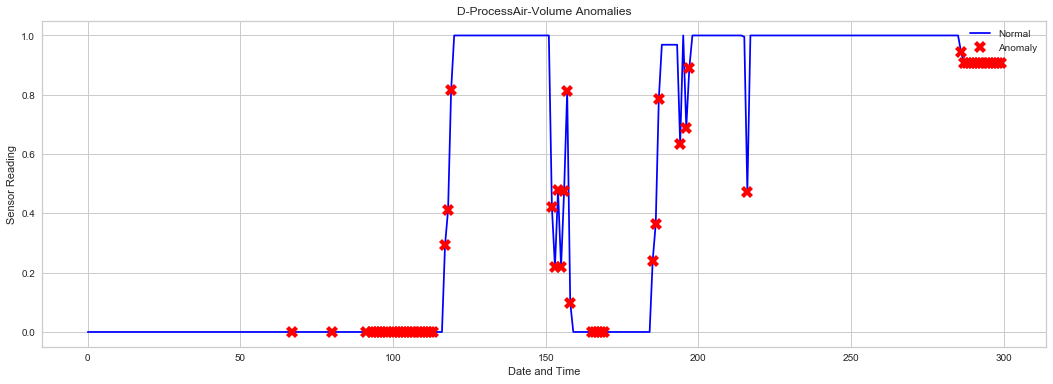

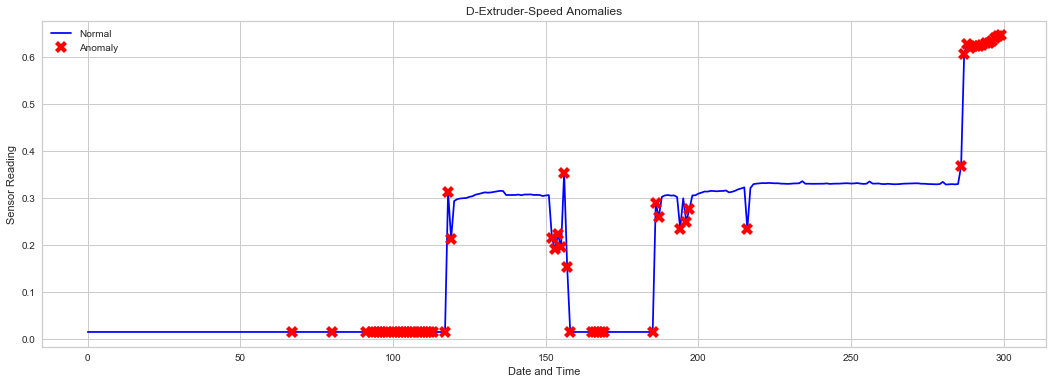

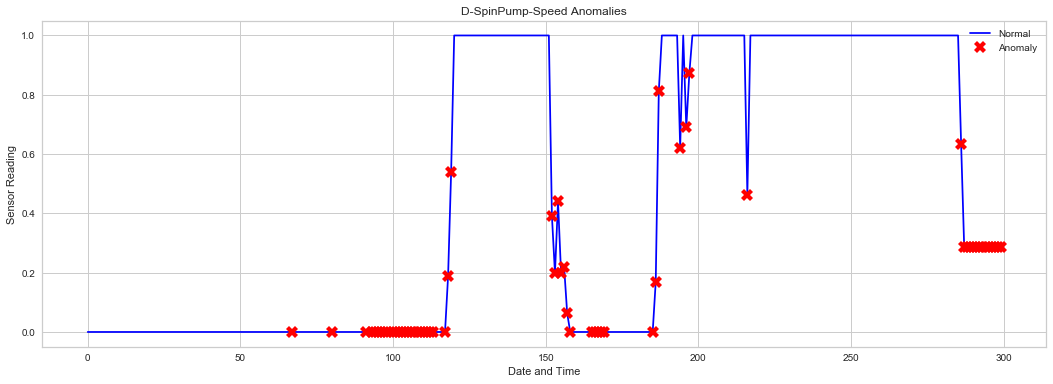

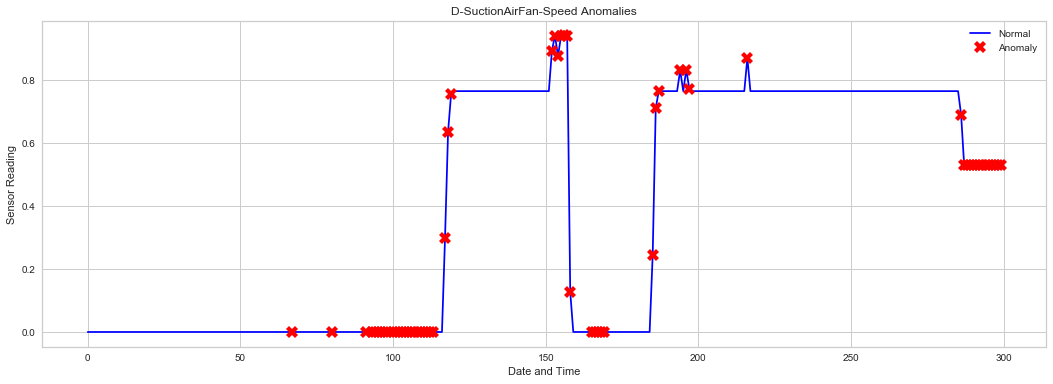

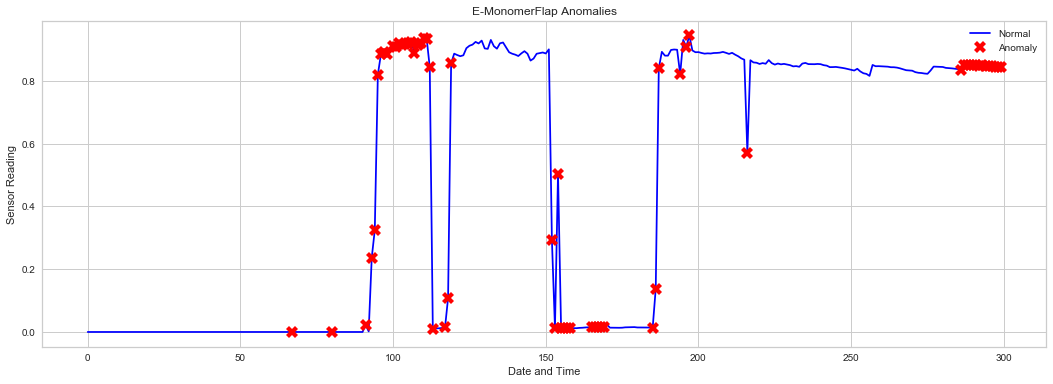

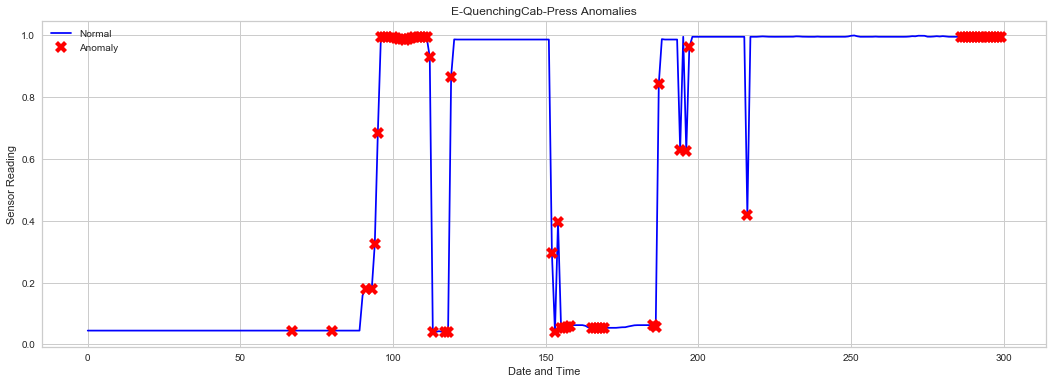

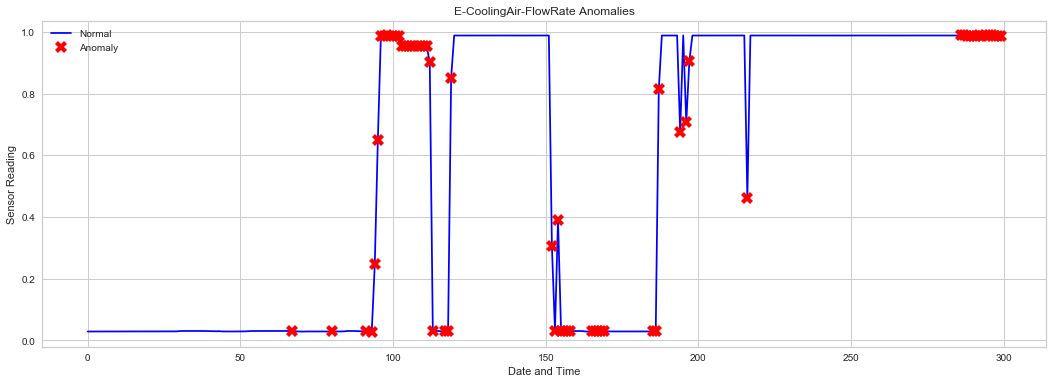

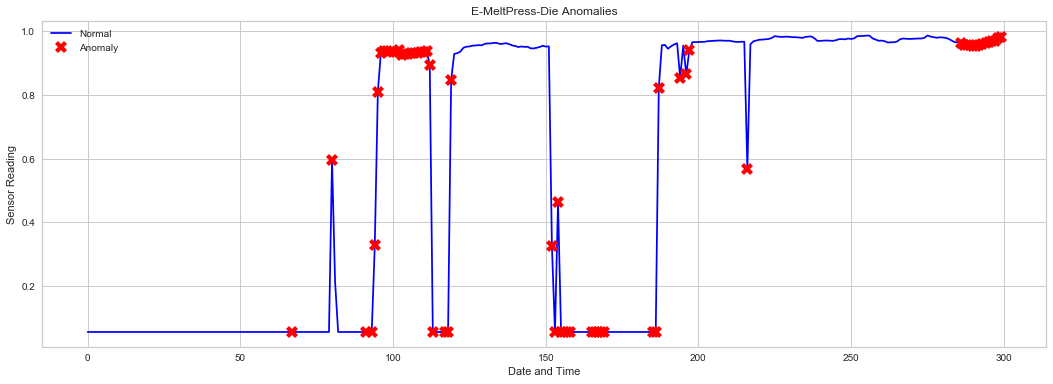

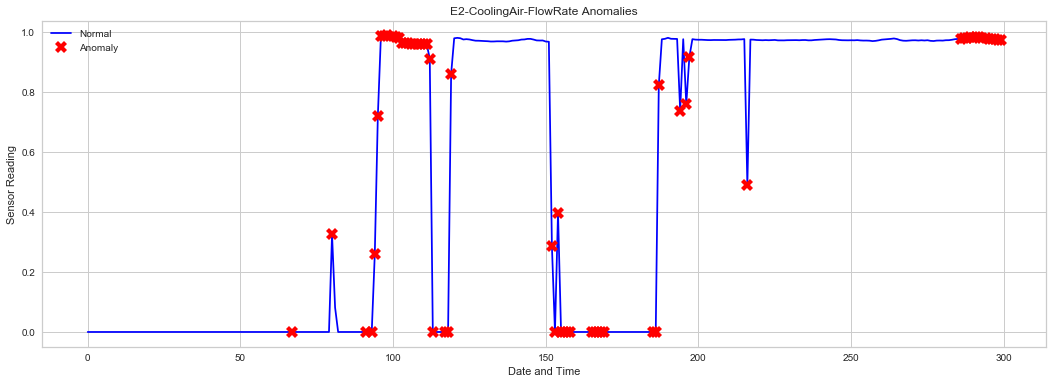

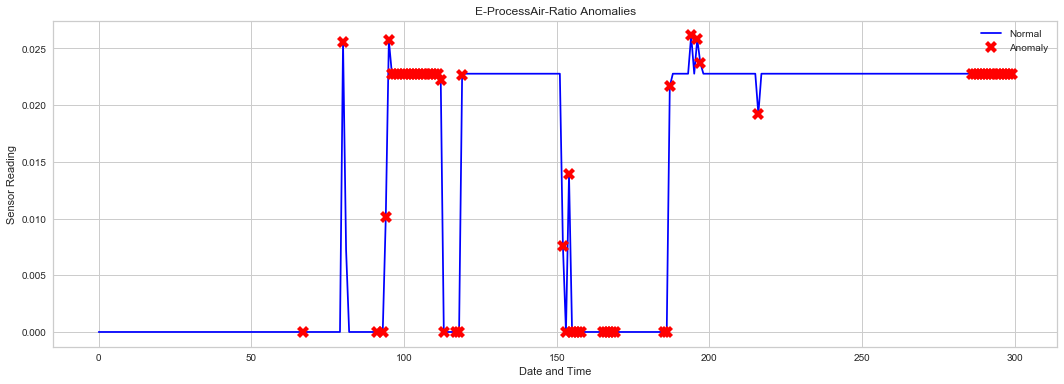

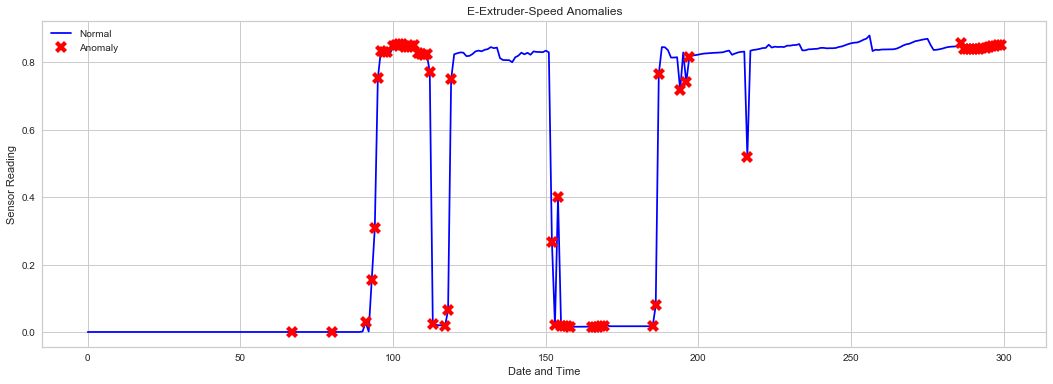

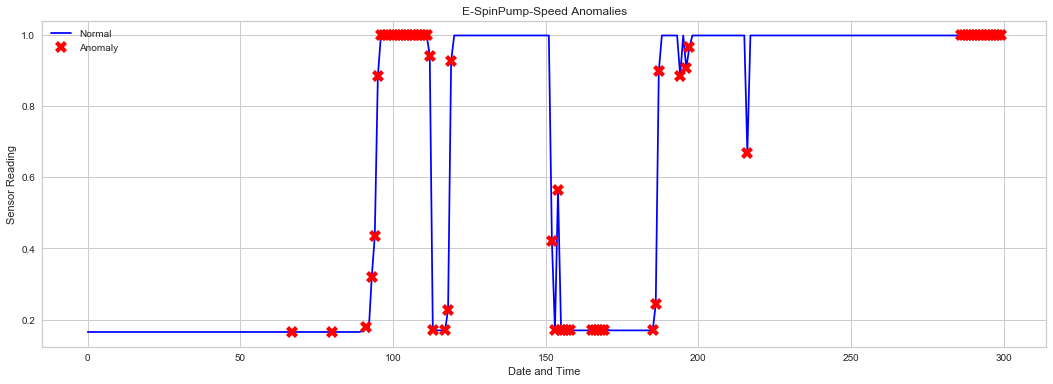

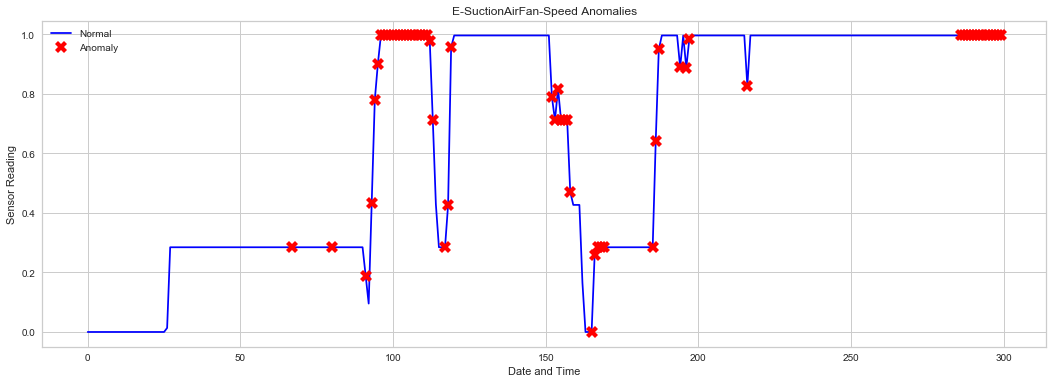

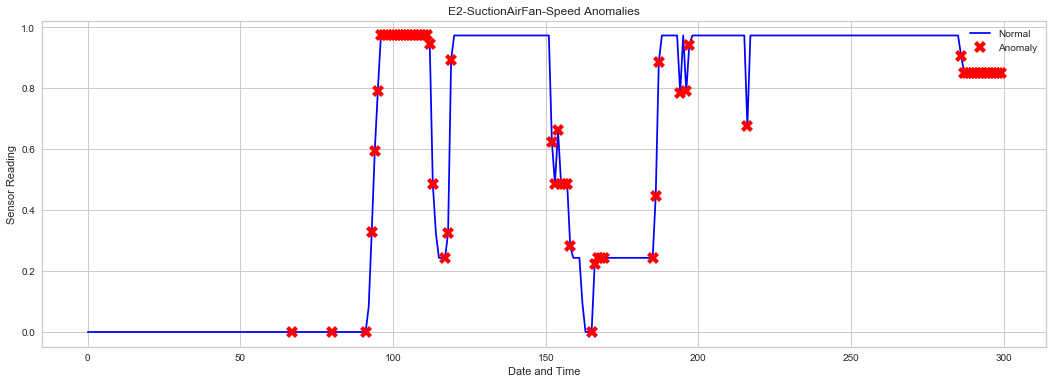

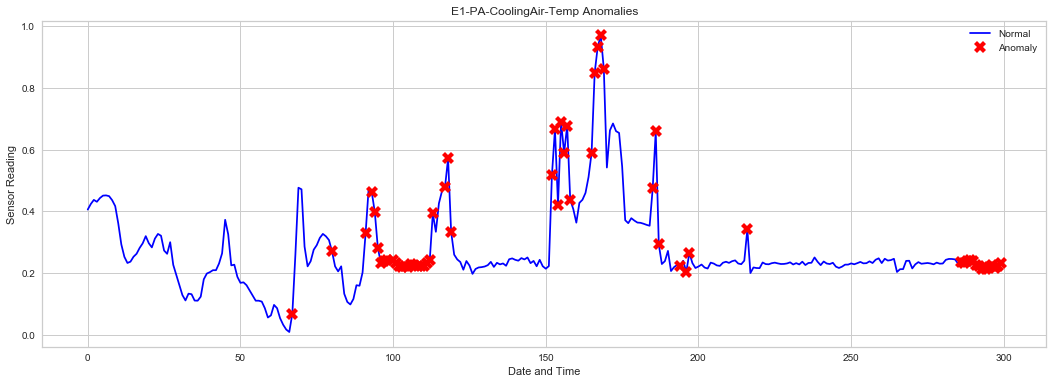

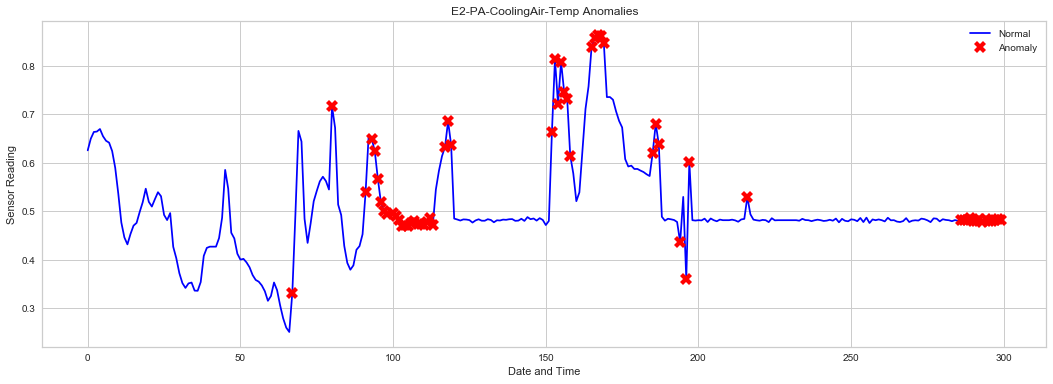

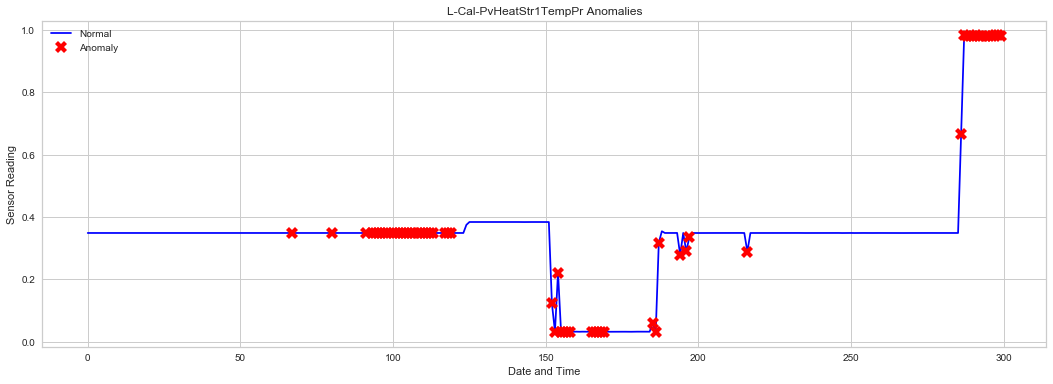

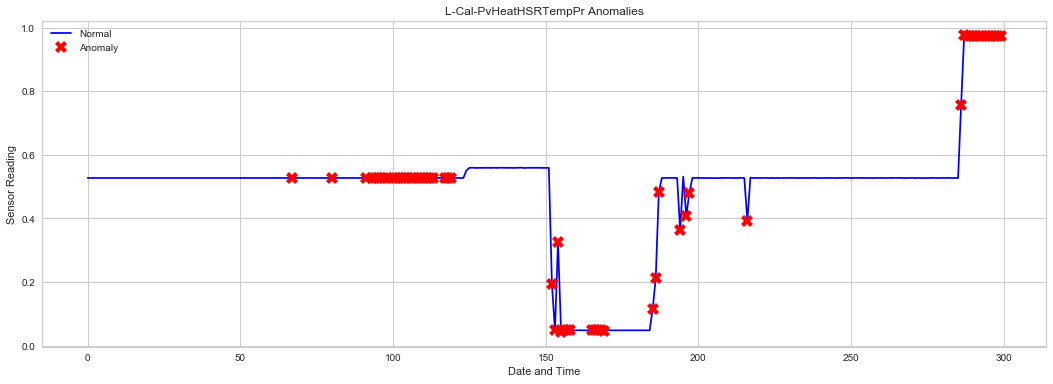

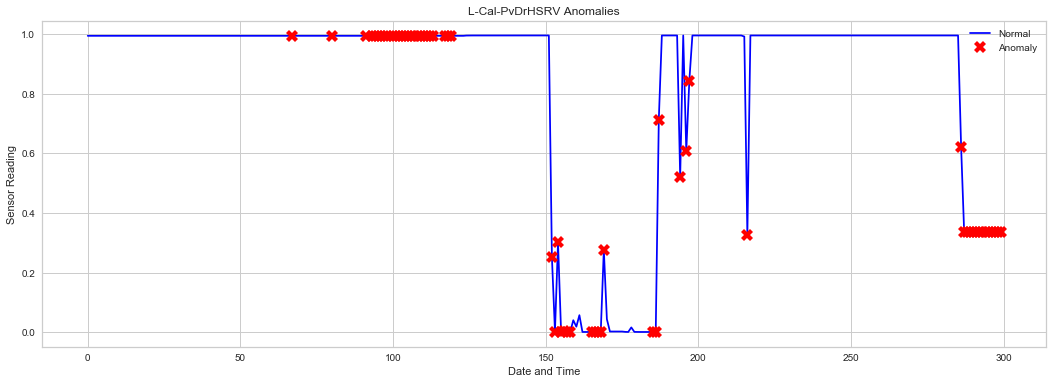

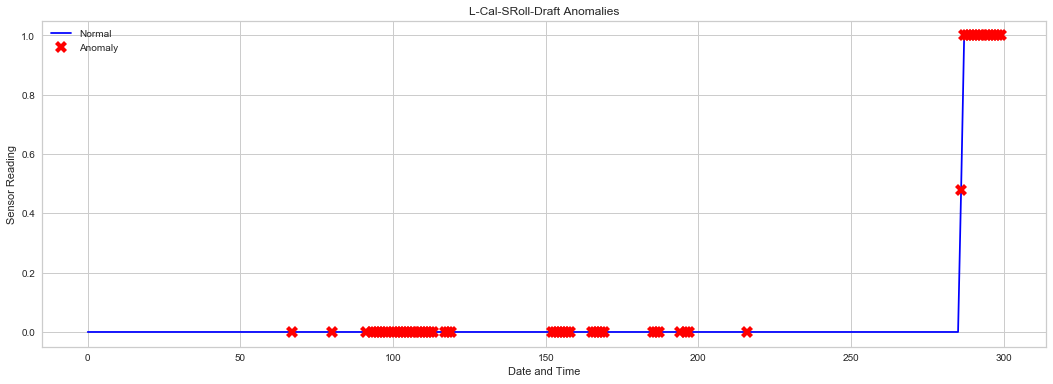

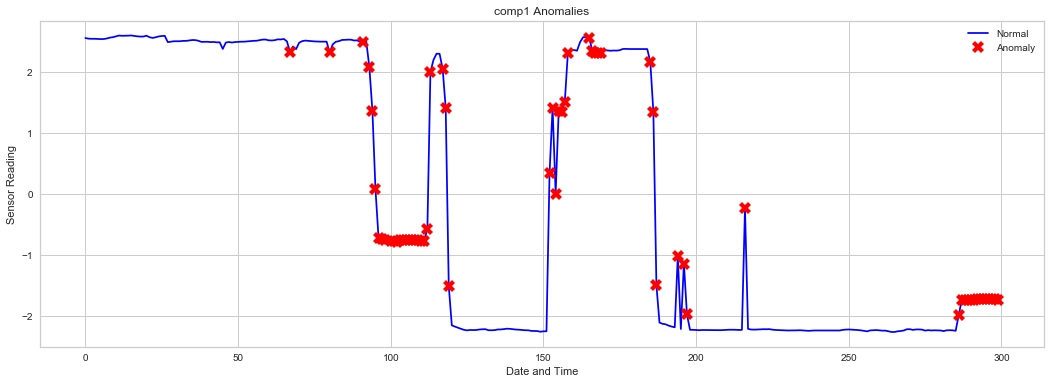

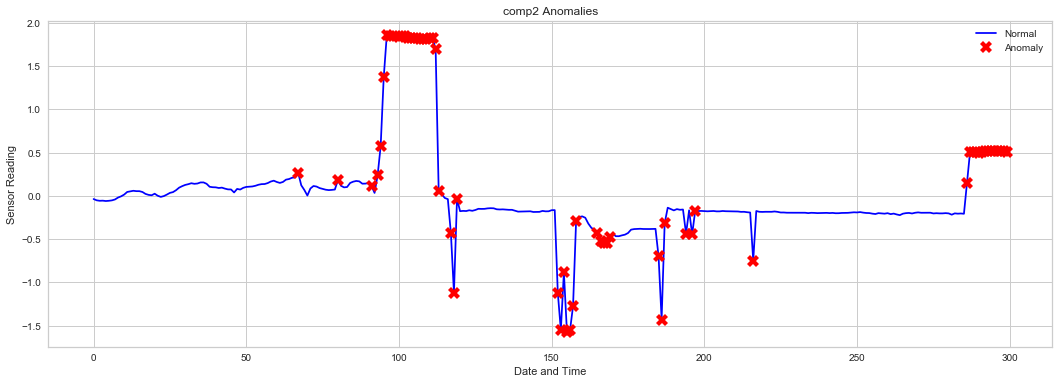

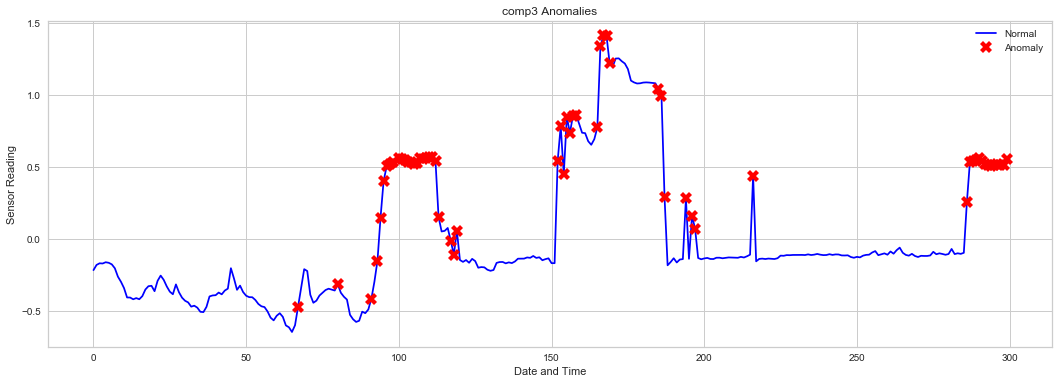

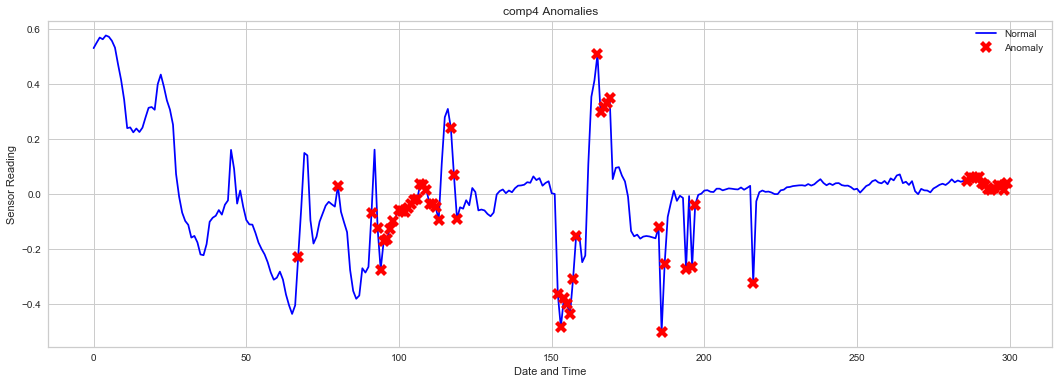

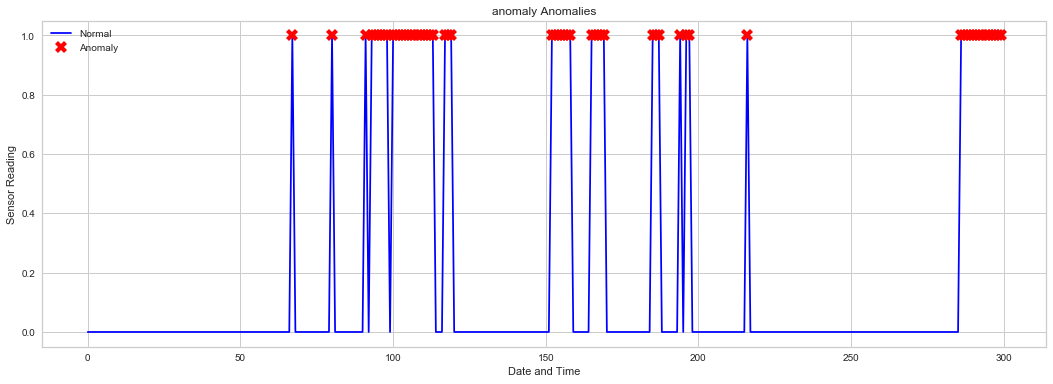

In [167]:
from sklearn.ensemble import IsolationForest

# Assume that 13% of the entire data set are anomalies
outliers_fraction = 0.13
model =  IsolationForest()
#(contamination=outliers_fraction)
model.fit(X)

df['anomaly'] = pd.Series(model.predict(X))
df['anomaly'] = df['anomaly'].apply(lambda x: 0 if x ==1 else 1)

attributes = [col for col in df.columns if col != 'cluster']
for attrib in attributes:

    # visualization
    _ = plt.figure(figsize=(18,6))
    _ = plt.plot(df[attrib], color='blue', label='Normal')
    _ = plt.plot(df[attrib][df['anomaly'] == 1], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
    _ = plt.xlabel('Date and Time')
    _ = plt.ylabel('Sensor Reading')
    _ = plt.title(attrib+' Anomalies')
    _ = plt.legend(loc='best')
    plt.show();